# Modeling

* [1. Dimensionality reduction](#1)
    * [1.1 Correlation matrix](#1.1)
    * [1.2 Principal Component Analysis (PCA)](#1.2)
    * [1.3 Logistic regression with L1 regularization](#1.3)
    * [1.4 Recursive feature elimination (RFE)](#1.4)
* [2. Baseline model (Logistic Regression)](#2)
* [3. Random Forest Classifier](#3)
    * [3.1 Full dataset](#3.1)
        * [3.1.1 Hyperparameter tuning (one iteraction, manual)](#3.1.1)
            * [3.1.1.1 Parameters n_estimatiors and max_depth](#3.1.1.1)
            * [3.1.1.2 Parameters min_samples_split and min_samples_leaf](#3.1.1.2)
            * [3.1.1.3 Parameters max_features, bootstrap and max_samples](#3.1.1.3)
        * [3.1.2 Result](#3.1.2)
    * [3.2 Reduced dataset 1](#3.2)
* [4. Gradient Boosting Classifiers](#4)
    * [4.1 GrandientBoosting, HistGradientBoosting, XGBoost or LightGBM model?](#4.1)
    * [4.2 LightGBM Classifier](#4.2)
        * [4.2.1 Hyperparameter tuning (one iteration, manual)](#4.2.1)
            * [4.2.1.1 Full dataset](#4.2.1.1)
                * [4.2.1.1.1 Parameter  boosting_type](#4.2.1.1.1)
                * [4.2.1.1.2 Parameters n_estimatiors and learning_rate](#4.2.1.1.2)
                * [4.2.1.1.3 Parameters num_leaves and learning rate](#4.2.1.1.3)
                * [4.2.1.1.4 Parameters colsample_bytree and feature_fraction_bynode](#4.2.1.1.4)
                * [4.2.1.1.5 Parameter subsample ](#4.2.1.1.5)
                * [4.2.1.1.6 Parameters reg_lambda and reg_alpha](#4.2.1.1.6)
                * [4.2.1.1.7 Parameter min_child_samples](#4.2.1.1.7)
                * [4.2.1.1.8 Parameter min_data_in_bin](#4.2.1.1.8)
                * [4.2.1.1.9 Parameter max_bin](#4.2.1.1.9)
                * [4.2.1.1.10 Parameters is_unbalance and scale_pos_weigh](#4.2.1.1.10)
                * [4.2.1.1.11 Result](#4.2.1.1.11)
            * [4.2.1.2 Reduced dataset 1](#4.2.1.2)
        * [4.2.2 Hyperparameter tuning (Bayesian optimization)](#4.2.2)       
            * [4.2,2,1 Reduced dataset 1](#4.2.2.1)
            * [4.2,2,2 Reduced dataset 2](#4.2.2.2)
            * [4.2,2,3 Reduced dataset 3](#4.2.2.3)
            * [4.2,2,4 Reduced dataset 4](#4.2.2.4)
            * [4.2,2,5 Full dataset](#4.2,2,5) 
    * [4.3 XGBoost Classifier](#4.3)
        * [4.3.1 Hyperparameter tuning (one iteration, manual), full dataset](#4.3.1)
        * [4.3.2 Hyperparameter tuning (Bayesian optimization)](#4.3.2)
            * [4.3,2,1 Reduced dataset 1](#4.3.2.1)
            * [4.3,2,2 Full dataset](#4.3,2,2) 
* [5. Classification with Neural Network](#5)
    * [5.1 NN3_1800_940_470_1 model](#5.1)
    * [5.2 NN3_360_180_90_1 model](#5.2)
    * [5.3 NN3_360_720_180_1 model](#5.3)
    * [5.4 NN3_360_90_45_1 model](#5.4)
    * [5.5 NN3_360_360_360_1 model](#5.5)
    * [5.6 NN4_360_180_90_45_1 model](#5.6)
* [6. Summary](#6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.bbox'] = 'tight'

#plt.rcParams['figure.figsize'] = (8.0, 10.0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("./data/work_final_4modeling.csv",index_col='ID',low_memory=False)
dp = pd.read_csv("./data/pred_final_4modeling.csv",index_col='ID',low_memory=False)

df.shape,dp.shape

((145231, 1892), (145232, 1892))

In [4]:
cols_to_rm = ['VAR_0181', 'VAR_0512', 'VAR_0201', 'VAR_0182', 'VAR_0529', 'VAR_0228', 'VAR_0238', 'VAR_0210'
             ,'VAR_0211', 'VAR_0357', 'VAR_0013', 'VAR_1036']

df = df.drop(cols_to_rm,axis=1)
dp = dp.drop(cols_to_rm,axis=1)

df.shape,dp.shape

((145231, 1880), (145232, 1880))

In [3]:
df = pd.read_csv("./data/work_final_4modeling.csv",index_col='ID',low_memory=False)

cols_to_rm = ['VAR_0181', 'VAR_0512', 'VAR_0201', 'VAR_0182', 'VAR_0529', 'VAR_0228', 'VAR_0238', 'VAR_0210'
             ,'VAR_0211', 'VAR_0357', 'VAR_0013', 'VAR_1036']

X = df.drop(cols_to_rm,axis=1)

X.shape

(145231, 1880)

In [4]:
y = pd.read_csv("./data/work_target.csv",index_col='ID',low_memory=False)
y.shape

(145231, 1)

## 1. Dimensionality reduction<a id='1'></a>

### 1.1 Correlation matrix<a id='1.1'></a>

Let's plot the covariance matrix:

0.0 min elapsed


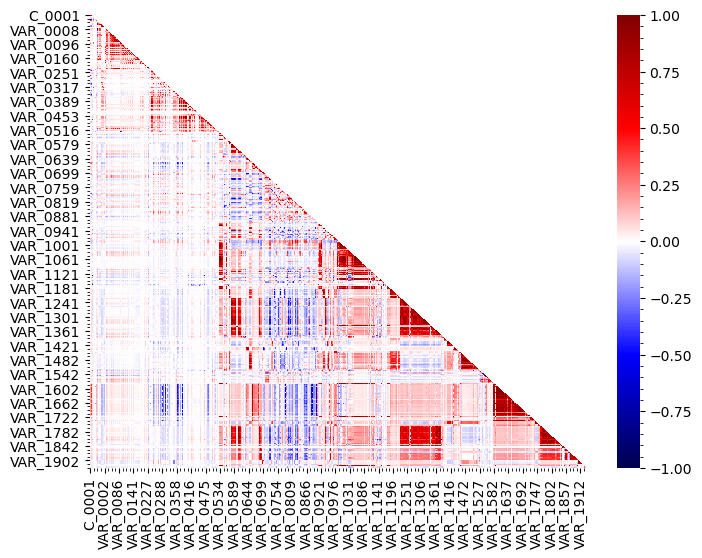

In [7]:
t1 = dt.now()

#from_file = False
from_file = True

if from_file:
    with open('./data/cov_matrix.pkl', 'rb') as f:
        cm = pickle.load(f)
else:
    cm = df.corr()

    with open('./data/cov_matrix.pkl', 'wb') as f:   
        pickle.dump(cm, f)

    #takes 13.1 minutes

f, ax = plt.subplots(figsize=(8, 6))

mask = np.triu(np.ones_like(cm, dtype=bool))

sns.heatmap(cm,mask=mask,cmap='seismic',center=0,vmin=-1.,vmax=1)

t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')

and the histogram of Pearson coefficients $c_P$ for each column pair (no double counting, no diagonal), together with its cumulative distribution integrated from the  high coefficient side (starting form $c_P$=1):

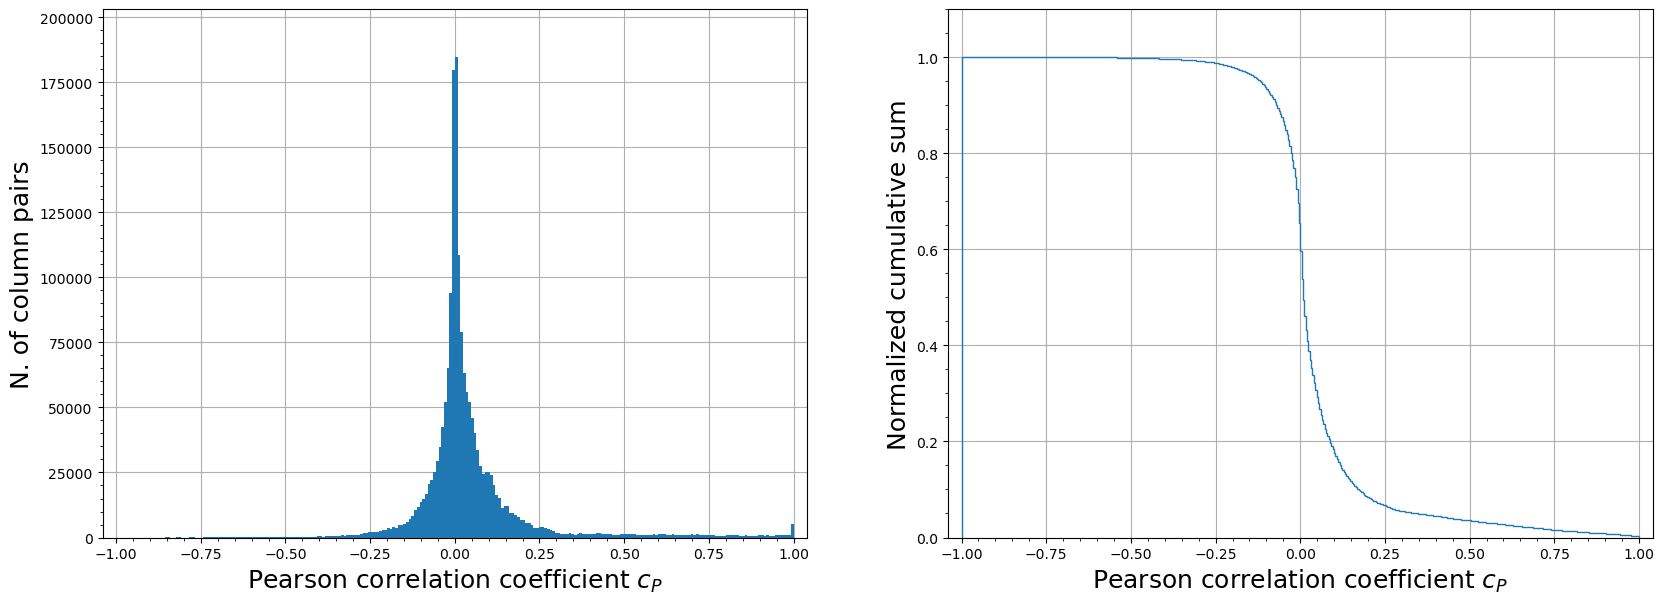

In [19]:
plt.rcParams.update({'axes.labelsize': 18})

fig, ax = plt.subplots(1,2,figsize=(20,7)) # (20,5) for report

ax[0].hist(cm.values[mask].ravel(),bins=250)
ax[0].set_xlabel('Pearson correlation coefficient $c_P$')
ax[0].set_ylabel('N. of column pairs')
ax[1].hist(cm.values[mask].ravel(),bins=500,density=True, histtype='step', cumulative=-1)
ax[1].set_xlabel('Pearson correlation coefficient $c_P$')
ax[1].set_ylabel('Normalized cumulative sum');

Not very helpful. By putting a rather loose condition $|c_P|$ <0.5 we would remove only about 5% of columns, so pretty minimal reduction. 

However, we do see a small excess in the $c_P$ distribution at $c_P=1#. This means that we do have pairs of fully correlated columns. What are they?: 

In [9]:
for item in cm.index:
    cm.loc[item, item] = 0

dups = []
for i,row in enumerate(cm.index):
    for j,col in enumerate(cm.columns):
        if cm.loc[row,col] == 1 and i<j:
            print(row,col)
            dups.append((row,col))
            
print(len(dups),'pairs')

VAR_0006 VAR_0013
VAR_0051 VAR_0201
VAR_0089 VAR_0238
VAR_0180 VAR_0181
VAR_0180 VAR_0182
VAR_0181 VAR_0182
VAR_0208 VAR_0210
VAR_0208 VAR_0211
VAR_0210 VAR_0211
VAR_0227 VAR_0228
VAR_0260 VAR_0357
VAR_0506 VAR_0512
VAR_0526 VAR_0529
VAR_0916 VAR_1036


14 pairs. Are they indeed identical?:

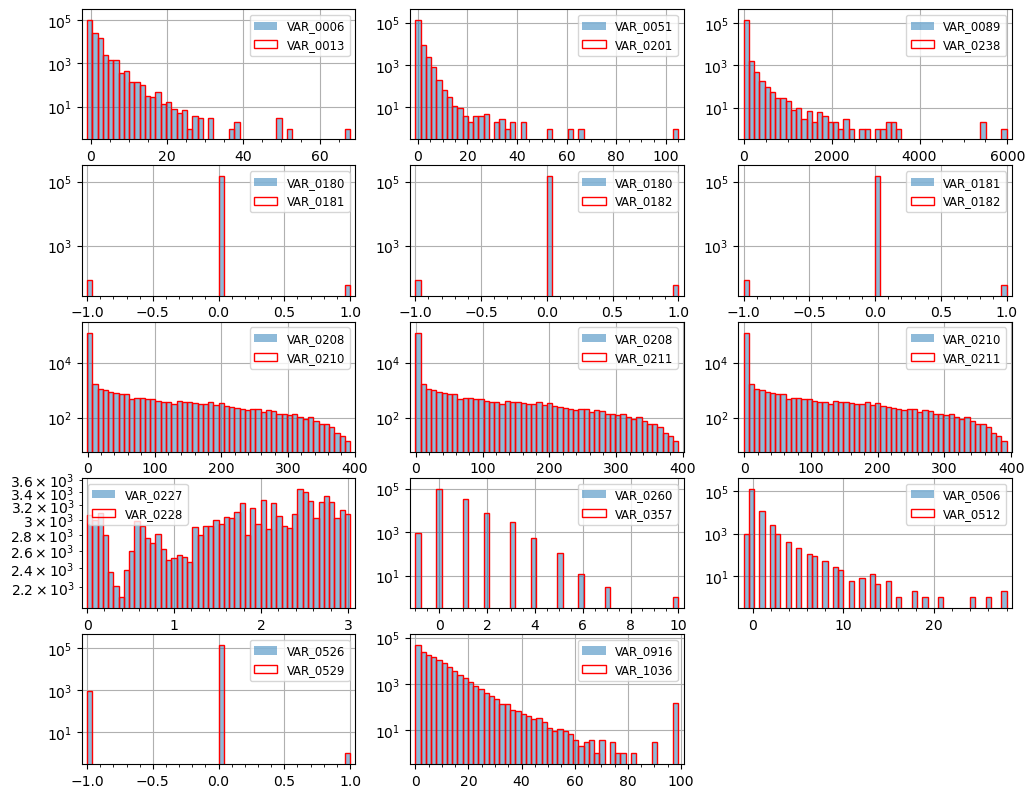

In [8]:
fig, ax = plt.subplots(5,3,figsize=(12,10))

ax = ax.ravel()
ax[14].axis("off")

for i,(row,col) in enumerate(dups):
    df[row].hist(bins=50,ax=ax[i],log=True,alpha=0.5,label=row)
    df[col].hist(bins=50,ax=ax[i],log=True,fill=False,edgecolor='r',label=col)
    
    ax[i].legend(fontsize='small')

Yes, they are. So let's remove the duplicates from the dataset.

In [12]:
cols_to_rm = set([c for (r,c) in dups])
print(len(cols_to_rm),'columns to remove:',cols_to_rm)

12 columns to remove: {'VAR_0013', 'VAR_0512', 'VAR_0210', 'VAR_0357', 'VAR_0182', 'VAR_0211', 'VAR_0201', 'VAR_0238', 'VAR_0181', 'VAR_0228', 'VAR_0529', 'VAR_1036'}


In [13]:
df = df.drop(cols_to_rm,axis=1)
dp = dp.drop(cols_to_rm,axis=1)

df.shape,dp.shape

((145231, 1880), (145232, 1880))

We're left with "only" 1880 columns :-)

In [6]:
X = df

y.shape

(145231, 1)

### 1.2 Principal Component Analysis (PCA)<a id='1.2'></a>

The study is covered in this [notebook](./pca.ipynb)

### 1.3 Logistic Regression with L1 regularization<a id='1.3'></a>

The study is covered in this [notebook](./lr_l1_regularization.ipynb)

### 1.4 Recursive Feature Elimiation (RFE)<a id='1.4'></a>

The study is covered in this [notebook](./recursive_feature_elimination.ipynb)

## 2. Baseline model (Logistic Regression)<a id='2'></a>

We take Logistic Regression with the best score auc_roc = 0.7596 for C = 0.02 (see Sec. 1.3 above) as the baseline model.

## 3. Random Forest Classifier<a id='3'></a>

In [5]:
model = RandomForestClassifier(random_state=123)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [24]:
def model_tune(grid={},fname='rf_grid',fid=0,from_file=False):
    
    t1 = dt.now()
    
    model_grid = 0
    
    if from_file:
        with open('./data/{}{}.pkl'.format(fname,fid), 'rb') as f:
            model_grid = pickle.load(f)
    else:
        
        model_grid = GridSearchCV(model,param_grid=grid,scoring='roc_auc',return_train_score=True,refit=False
                               ,cv=2,verbose=2)#,n_jobs=-1)
        
        model_grid.fit(X_train, y_train)
        
        with open('./data/{}{}.pkl'.format(fname,fid), 'wb') as f:
            pickle.dump(model_grid, f)

    print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
    
    return model_grid

In [25]:
def plot_one_par(grid_res,par,logx=False,ymin=0):
    
    r = pd.DataFrame(grid_res.cv_results_)
    r.columns = r.columns.str.replace('param_','').str.replace('_score','').str.replace('mean_','')
    r['t_min'] = r['fit_time']/60.    
#    print(r.head(3))
    
    fig, ax = plt.subplots(1,3,figsize=(17,4))

    r.plot(par,'train',yerr='std_train',marker='o',markersize=3,ls='--',ax=ax[0])
    r.plot(par,'test',yerr='std_test',marker='o',markersize=4,c='C3',ax=ax[0])
    ax[0].set_ylabel('AUC',fontsize=13) 

    r.plot(par,'test',yerr='std_test',marker='o',markersize=4,c='C3',ax=ax[1])
    
    r.plot(par,'t_min',ls=':',ax=ax[2])
    ax[2].set_ylabel('Avg. fit time (min)',fontsize=13)
    
    if ymin > 0: 
        for ai in ax: ai.set_ylim(bottom=ymin)
        
    if logx:
        for ai in ax: ai.set_xscale("log")

In [26]:
def plot_two_pars(grid_res,par1,par2,logx=False,ymin=0,swap_legend=False):

    r = pd.DataFrame(grid_res.cv_results_)
    r.columns = r.columns.str.replace('param_','').str.replace('_score','').str.replace('mean_','')
    r['t_min'] = r['fit_time']/60.    
#    print(r.head(3))
    
    fig, ax = plt.subplots(1,3,figsize=(17,4))

    c = ['C3','C0']

    grouped = r.groupby(par2)
    if swap_legend:   
        grouped = r.sort_values(par2,ascending=False).groupby(par2,sort=False)

    for i, (key, group) in enumerate(grouped):
    
        group.plot(par1,'train',yerr='std_train',label='train, {} = {}'.format(par2,key),c=c[i],ls='--',ax=ax[0])
        group.plot(par1,'test' ,yerr='std_test' ,label='test , {} = {}'.format(par2,key),c=c[i],ax=ax[1])
        group.plot(par1,'t_min', label='{} = {}'.format(par2,key),ls='-.',c=c[i],ax=ax[2])

    ax[0].set_ylabel('AUC',fontsize=13)
    ax[2].set_ylabel('Avg. fit time (min)',fontsize=13)
    
    if ymin > 0: 
        for ai in ax: ai.set_ylim(bottom=ymin)
        
    if logx:
        for ai in ax: ai.set_xscale("log")
            
    for ai in ax:
        ai.legend(loc='lower right',fontsize=12)

### 3.1 Full dataset <a id='3.1'></a>

In [17]:
X.shape

(145231, 1880)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

#### 3.1.1 Hyperparameter tuning <a id='3.1.1'></a>

##### 3.1.1.1 Parameters n_estimatiors and max_depth <a id='3.1.1.1'></a>

In [11]:
ff=True

In [20]:
#np.logspace(np.log10(100),np.log10(1900*3),10).astype(int)

In [9]:
np.logspace(np.log10(200),np.log10(1880*5),8).astype(int)

array([ 200,  346,  600, 1041, 1805, 3128, 5423, 9400])

0.0 min elapsed


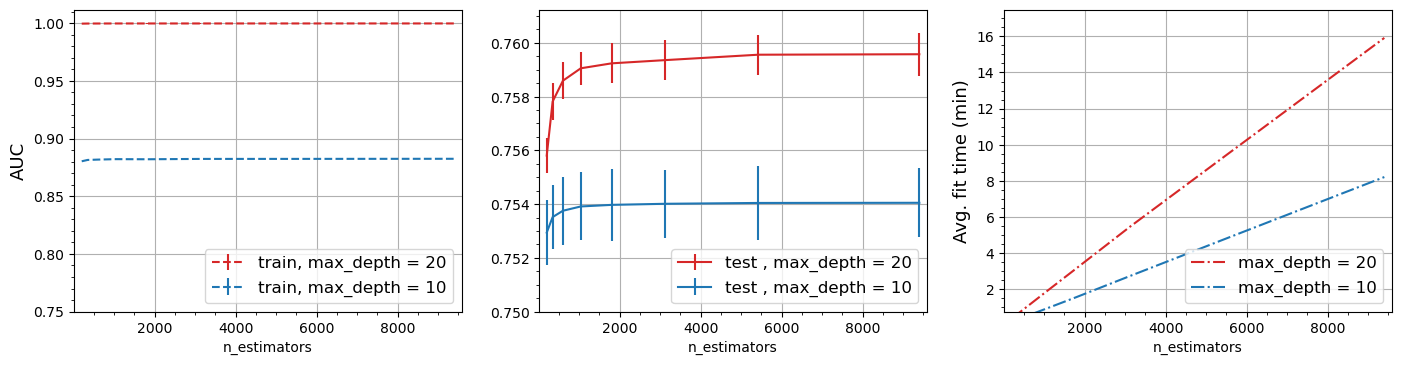

In [12]:
model = RandomForestClassifier(random_state=123,n_jobs=-1)
grid = {'n_estimators': np.logspace(np.log10(200),np.log10(5*1880),8).astype(int),
        'max_depth': [10,20]}

r0 = model_tune(grid,fid=0,from_file=ff) # 122 min elapsed

plot_two_pars(r0,'n_estimators','max_depth',ymin=0.75,swap_legend=True)

0.0 min elapsed


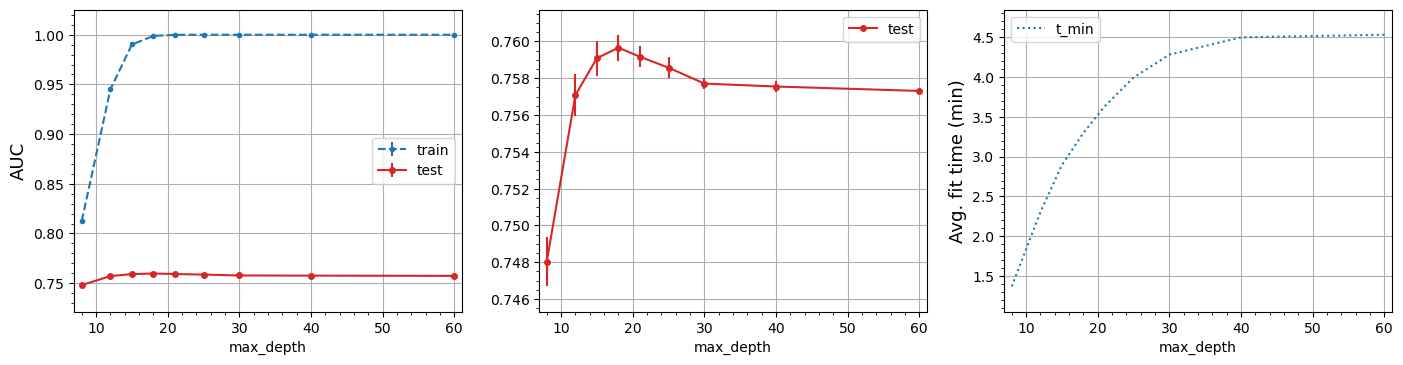

In [13]:
model = RandomForestClassifier(n_estimators=2000,random_state=123,n_jobs=-1)
grid = {'max_depth': [8, 12, 15, 18, 21, 25, 30, 40, 60]}

r1 = model_tune(grid,fid=1,from_file=ff) #66 min elapsed

plot_one_par(r1,'max_depth')

##### 3.1.1.2 Parameters min_samples_split and min_samples_leaf <a id='3.1.1.2'></a>

In [24]:
np.logspace(np.log10(2.1),np.log10(40),8).astype(int)

array([ 2,  3,  4,  7, 11, 17, 26, 40])

0.0 min elapsed


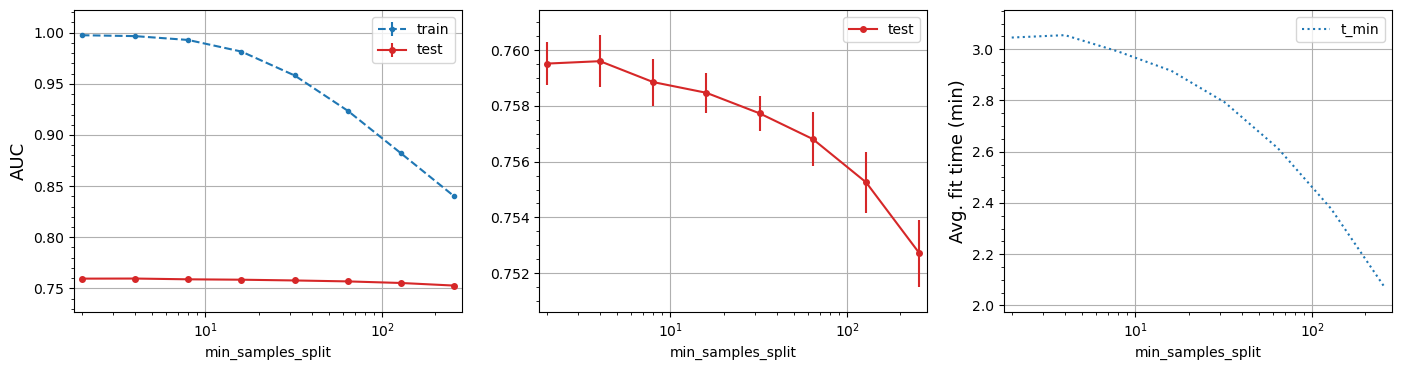

In [14]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,random_state=123,n_jobs=-1)
grid = {'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256]}

r2 = model_tune(grid,fid=2,from_file=ff)#47 min

plot_one_par(r2,'min_samples_split',logx=True)

0.0 min elapsed


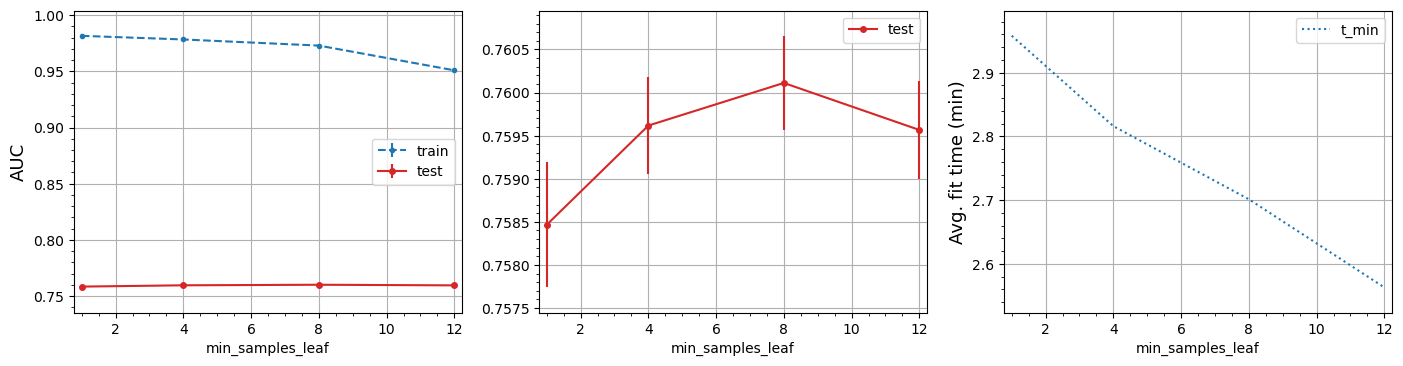

In [15]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,min_samples_split=16,random_state=123,n_jobs=-1)
grid = {'min_samples_leaf': [1, 4, 8, 12]}

r3 = model_tune(grid,fid=3,from_file=ff) #23.8 min

plot_one_par(r3,'min_samples_leaf')

##### 3.1.1.3 Parameters max_features, bootstrap and max_samples <a id='3.1.1.3'></a>

In [28]:
nf = X.shape[1]
nf, np.log2(nf).round(), np.sqrt(nf).round()

(1880, 11.0, 43.0)

0.0 min elapsed


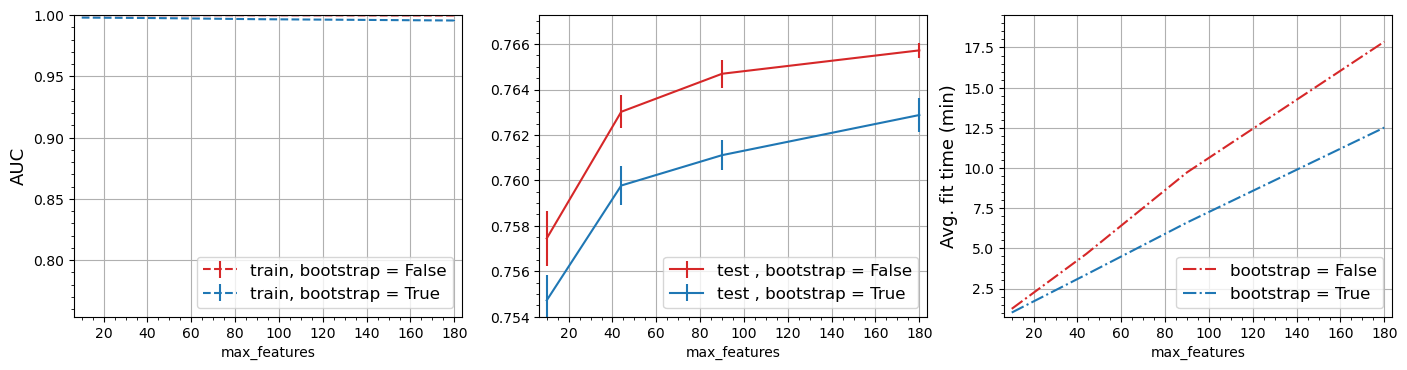

In [16]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,random_state=123,n_jobs=-1)
grid = {'max_features': [10, 44, 90, 180],
        'bootstrap': [False,True]}

r4 = model_tune(grid,fid=4,from_file=ff) #118.2

plot_two_pars(r4,'max_features','bootstrap',ymin=0.754)

#### 3.1.2 Result <a id='3.1.2'></a>

In [49]:
rf_final = RandomForestClassifier(n_estimators=2000,
                                  max_depth=17,
                                  max_features = 180,
                                  bootstrap = False,
                                  n_jobs=-1,
                                  random_state=123)
rf_final.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 180,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

In [17]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/rf_final.pkl', 'rb') as f: 
        rf_final = pickle.load(f)
else:
    
    X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)
    
    rf_final.fit(X_train,y_train)
    
    with open('./data/rf_final.pkl', 'wb') as f:
        pickle.dump(rf_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 62.4 min elapsed

0.0 min elapsed


In [52]:
y_pred_proba_tr = rf_final.predict_proba(X_train)[:,1]
y_pred_proba    = rf_final.predict_proba(X_test)[:,1]
y_pred          = rf_final.predict(X_test)

roc_auc (train)=  0.99603
roc_auc (test) =  0.77916 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     27893
           1       0.68      0.23      0.35      8415

    accuracy                           0.80     36308
   macro avg       0.74      0.60      0.61     36308
weighted avg       0.78      0.80      0.76     36308



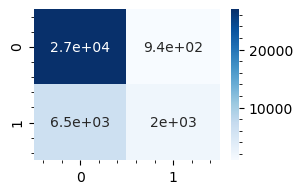

In [53]:
print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

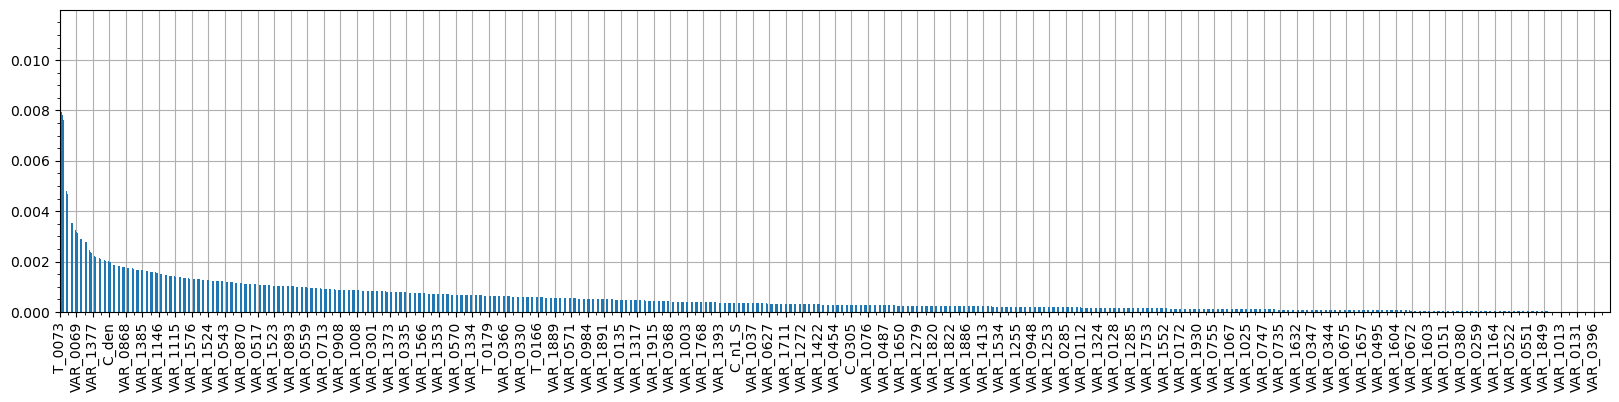

In [35]:
fi = pd.Series(rf_final.feature_importances_, index=X.columns)
ax = fi.sort_values(ascending=False).plot(kind='bar',figsize=(20,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax.set_yscale('log')

In [36]:
fi.sort_values(ascending=False).reset_index().head(5)

index         0
0    T_0073  0.010903
1  VAR_0795  0.008039
2  VAR_0070  0.007944
3  VAR_0137  0.007824
4  VAR_0080  0.007607

In [37]:
dfi = fi.sort_values(ascending=False).reset_index()
dfi[~dfi['index'].astype('str').str.contains('VAR')].head(10)

index         0
0    T_0073  0.010903
27   C_0237  0.002875
42   T_0075  0.002215
50    C_pop  0.002101
60    C_den  0.001986
61   T_0217  0.001974
97      T_n  0.001665
242  C_0342  0.001080
396  T_0176  0.000810
520  T_0179  0.000645

### 3.2 Reduced dataset  1<a id='3.2'></a>

In [54]:
with open('./data/cols_LR_c0_01.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
X_reduced.shape

(145231, 359)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

#### 3.2.1 Hyperparameter tuning <a id='3.2.1'></a>

In [40]:
np.logspace(np.log10(200),np.log10(5*1880),8).round()

array([ 200.,  347.,  601., 1041., 1805., 3129., 5423., 9400.])

0.0 min elapsed


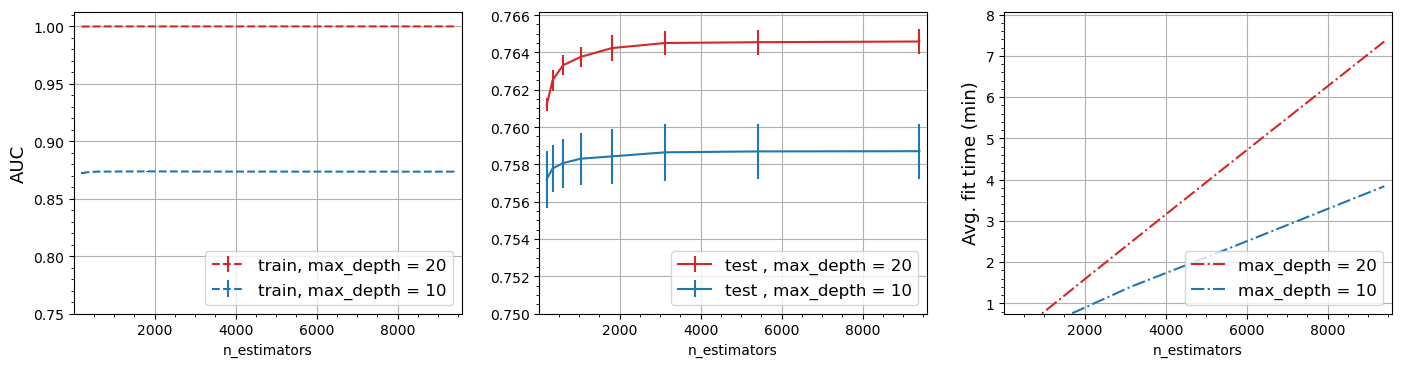

In [18]:
model = RandomForestClassifier(random_state=123,n_jobs=-1)
grid = {'n_estimators': np.logspace(np.log10(200),np.log10(5*1880),8).astype(int),
        'max_depth': [10,20]}

r0 = model_tune(grid,'rf_reduced',0,from_file=ff) # 59 min

plot_two_pars(r0,'n_estimators','max_depth',ymin=0.75,swap_legend=True)

0.0 min elapsed


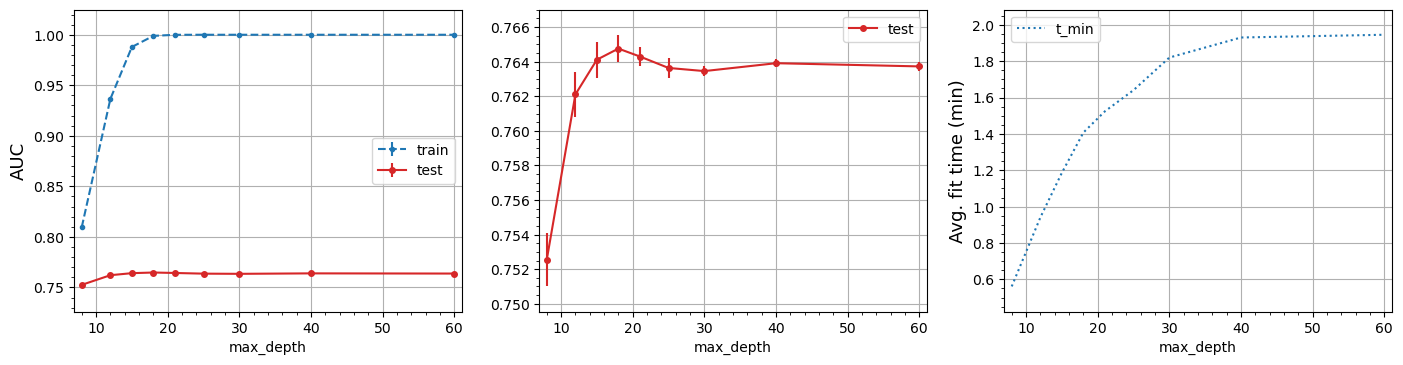

In [19]:
model = RandomForestClassifier(n_estimators=2000,random_state=123,n_jobs=-1)
grid = {'max_depth': [8, 12, 15, 18, 21, 25, 30, 40, 60]}

r1 = model_tune(grid,'rf_reduced',1,from_file=ff) #29 min

plot_one_par(r1,'max_depth')

0.0 min elapsed


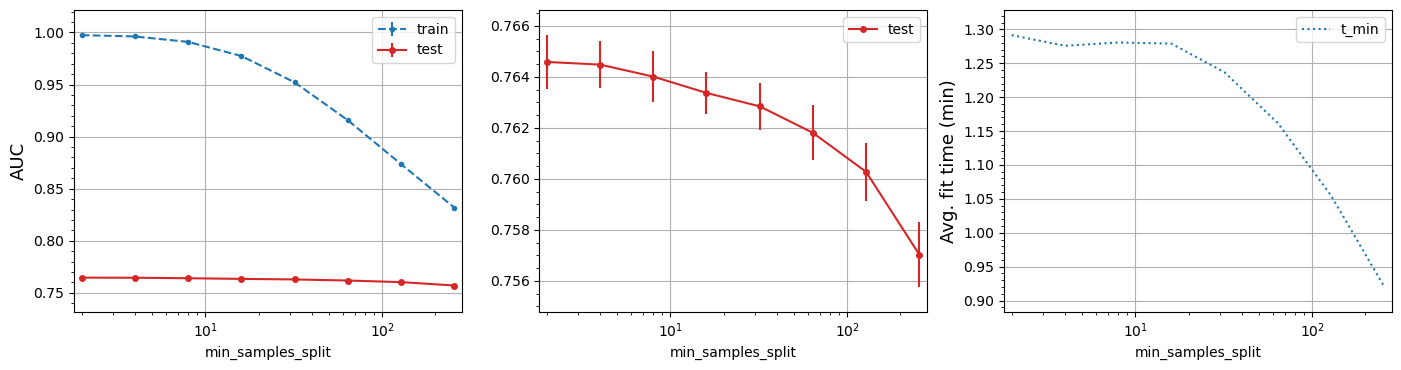

In [20]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,random_state=123,n_jobs=-1)
grid = {'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256]}

r2 = model_tune(grid,'rf_reduced',2,from_file=ff) # 21 min

plot_one_par(r2,'min_samples_split',logx=True)

0.0 min elapsed


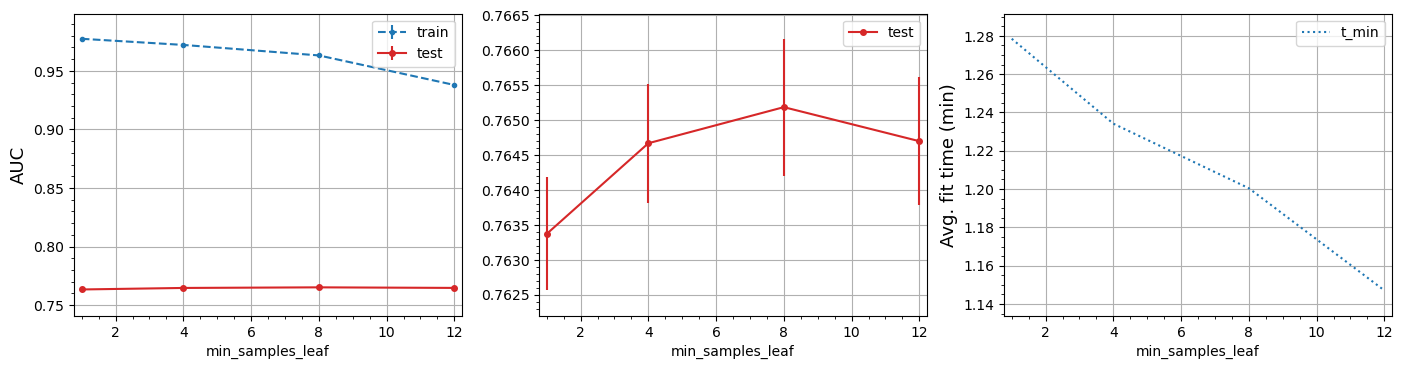

In [21]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,min_samples_split=16,random_state=123,n_jobs=-1)
grid = {'min_samples_leaf': [1, 4, 8, 12]}

r3 = model_tune(grid,'rf_reduced',3,from_file=ff) # 11 min

plot_one_par(r3,'min_samples_leaf')

In [45]:
nf = X_reduced.shape[1]
nf, np.log2(nf).round(), np.sqrt(nf).round()

(359, 8.0, 19.0)

In [46]:
359*np.array([0.1,0.2,0.3,0.5,0.8])

array([ 35.9,  71.8, 107.7, 179.5, 287.2])

0.0 min elapsed


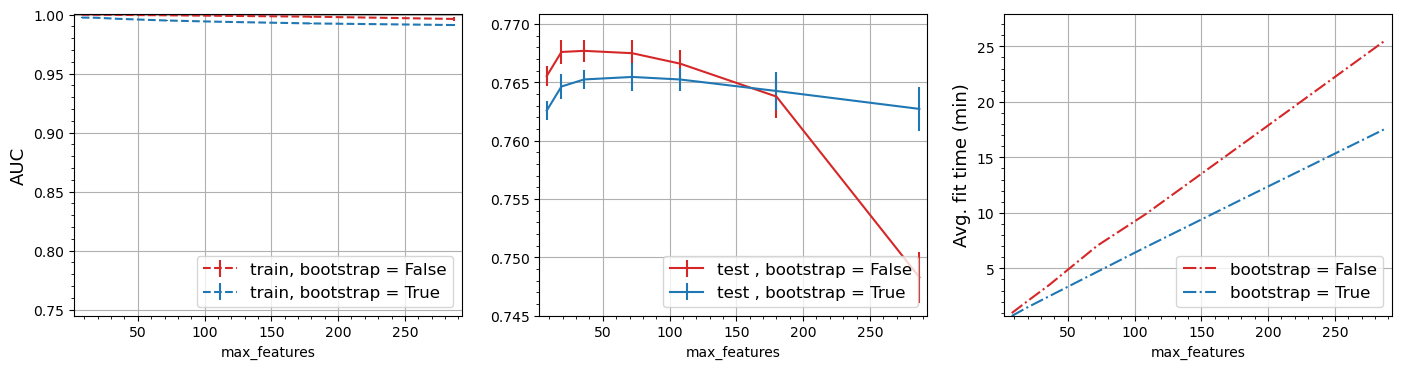

In [22]:
model = RandomForestClassifier(n_estimators=2000,max_depth=17,random_state=123,n_jobs=-1)
grid = {'max_features': [8, 19, 36, 72, 108, 180, 287],
        'bootstrap': [False,True]}

r4 = model_tune(grid,'rf_reduced',4,from_file=ff)#59 min

plot_two_pars(r4,'max_features','bootstrap',ymin=0.745)

#### 3.2.2 Result <a id='3.2.2'></a>

In [55]:
rf_reduced = RandomForestClassifier(n_estimators=2000,
                                  max_depth=17,
                                  max_features = 72,
                                  bootstrap = False,
                                  n_jobs=-1,
                                  random_state=123)
rf_reduced.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 72,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [23]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/rf_reduced_final.pkl', 'rb') as f: 
        rf_reduced = pickle.load(f)
else:
    
    rf_reduced.fit(X_train,y_train) # 61 min
    
    with open('./data/rf_reduced_final.pkl', 'wb') as f:
        pickle.dump(rf_reduced, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')

0.0 min elapsed


roc_auc (train)=  0.99466
roc_auc (test) =  0.77922 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     27893
           1       0.68      0.24      0.35      8415

    accuracy                           0.80     36308
   macro avg       0.74      0.60      0.62     36308
weighted avg       0.78      0.80      0.76     36308



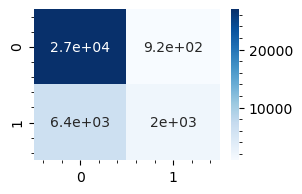

In [58]:
y_pred_proba_tr = rf_reduced.predict_proba(X_train)[:,1]
y_pred_proba    = rf_reduced.predict_proba(X_test)[:,1]
y_pred          = rf_reduced.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

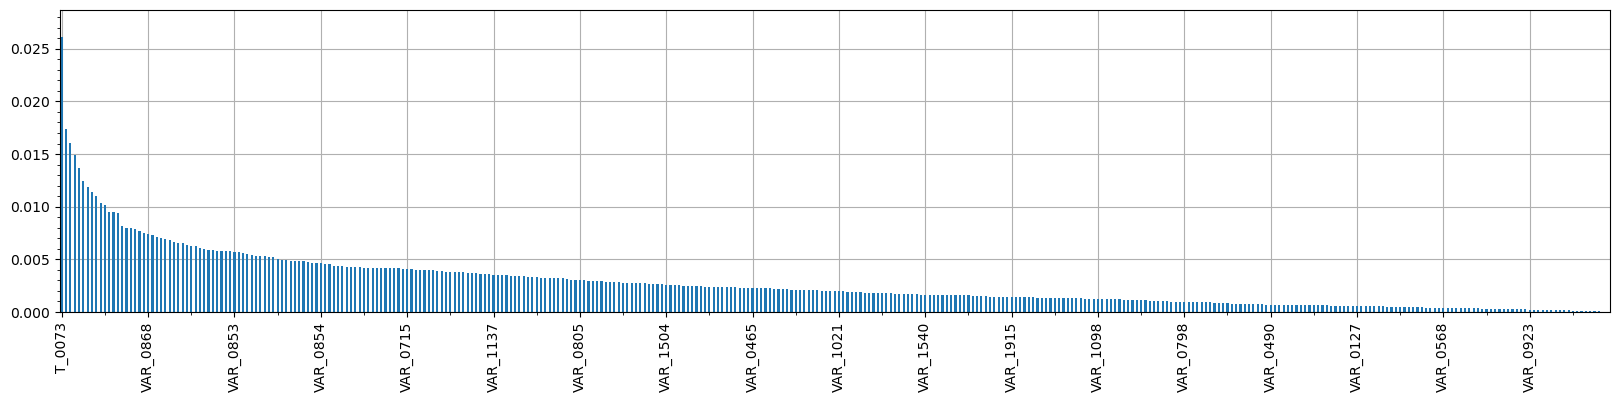

In [53]:
fi = pd.Series(rf_reduced.feature_importances_, index=X_reduced.columns)
ax = fi.sort_values(ascending=False).plot(kind='bar',figsize=(20,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax.set_yscale('log')

In [54]:
fi.sort_values(ascending=False).reset_index().head(5)

index         0
0    T_0073  0.026088
1  VAR_0071  0.017349
2  VAR_0795  0.016012
3  VAR_1127  0.014915
4  VAR_0105  0.013704

In [55]:
dfi = fi.sort_values(ascending=False).reset_index()
dfi[~dfi['index'].astype('str').str.contains('VAR')].head(10)

index         0
0    T_0073  0.026088
16   C_0237  0.007971
17   T_0075  0.007917
21    C_den  0.007299
84   C_0342  0.003966
127  T_0176  0.002807
179  C_0005  0.001971
207  C_0325  0.001582
213  C_1934  0.001499
215  C_0354  0.001462

## 4. Gradient Boosting Classifiers<a id='4'></a>

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [10]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_convergence

### 4.1 GrandientBoosting, HistGradientBoosting, XGBoost or LightGBM model? <a id='4.1'></a>

In [2]:
%%HTML

<style>
td {
  font-size: 15px
}
</style>

| GradientBoosting (GB)| XGBoost (XGB)| LightGBM (LGB) | HistGradientBoosting (HGB)|
|------------------|---------------|----------|--------------------------------|
| learning_rate = 0.1 | learning_rate = 0.3 | learning_rate = 0.1 | learning_rate = 0.1|
| n_estimators = 100 | n_estimators =  100 | n_estimators (num_iterations) = 100 | max_iter = 100 |
| max_depth = 3| max_depth = 6 | max_depth = None | max_depth = None |
| min_samples_split = 2 | - | - | - |
| min_samples_leaf = 1 | min_child_weight = 1 | min_child_samples (min_data_in_leaf) = 20 | min_samples_leaf = 20 |
| max_leaf_nodes = None | - | num_leaves = 31 | max_leaf_nodes = 31 |
| - | colsample_bytree = 1.0| colsample_bytree (feature_fraction) = 1.0 | - | 
| max_features = 1.0 |colsample_bynode = 1.0 | feature_fraction_bynode = 1.0 | - |
| subsample = 1.0 | subsample = 1.0 | subsample (bagging_fraction) = 1.0 | - |
| - |gamma = 1.0 | - | - |
| - | reg_lambda = 0.0 | reg_lambda (lambda_l1) = 0.0| - |
| - | reg_alpha = 1.0 | reg_alpha (lambda_l2) = 0.0| l2_regularization = 0.0 |
| - | - <br> tree_method = *hist*: max_bin = 256 |max_bin = 255 | max_bins = 255 (<=255) |
| - | n_jobs = -1 | n_jobs = -1 | n_jobs = -1 |

In [6]:
X.shape

(145231, 1880)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

In [8]:
def evaluate_models(models = ['HGB']):
    
    for model in models:
 
        t1 = dt.now()

        m = 0

        if model == 'GB':
            m = GradientBoostingClassifier(max_depth=6,random_state=123)
        
        elif model == 'XGB':
            m = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1
                             ,learning_rate=0.1)
            
        elif model == 'XGBh':
            m = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1
                             ,learning_rate=0.1,tree_method='hist')

        elif model == 'LGB': #2^max_depth > num_leaves
            m = LGBMClassifier(random_state=123,n_jobs=-1)

        elif model == 'LGB2':
            m = LGBMClassifier(max_bin=1024,random_state=123,n_jobs=-1)       

        elif model == 'HGB':
            
            m = HistGradientBoostingClassifier(random_state=123)
        
        else:
            print('Unknown model.')
            continue
        
        
        m.fit(X_train,y_train)

        y_pred = m.predict(X_test)
        y_pred_proba = m.predict_proba(X_test)[:,1]
 
        tdiff = (dt.now()-t1).total_seconds()/60

        print_scores(model,y_test,y_pred,y_pred_proba,tdiff)
        
        
def print_scores(mod,y_test,y_pred,y_pred_proba,tdiff):
    
    print('{:5} (time ={:6.2f} min):'.format(mod,tdiff)
          ,'roc_auc/accuracy= {:.4f}/{:.4f}'.format(roc_auc_score(y_test,y_pred_proba,average = "weighted")
          ,accuracy_score(y_test,y_pred))
          ,'precision/recall=',np.around(precision_score(y_test, y_pred,labels=[0,1],average=None),3)
          ,'/',np.around(recall_score(y_test, y_pred,labels=[0,1],average=None),3)
         )

In [64]:
# evaluate_models(['GB','XGB'])

GB    (time = 21.10 min): roc_auc/accuracy= 0.778/0.794 precision/recall= [0.815 0.621] / [0.946 0.293]
XGB   (time =  2.16 min): roc_auc/accuracy= 0.778/0.794 precision/recall= [0.814 0.627] / [0.949 0.284]


In [9]:
evaluate_models(['GB','XGB','XGBh','LGB','LGB2','HGB']) # 6 and 1

GB    (time = 22.39 min): roc_auc/accuracy= 0.7777/0.7941 precision/recall= [0.815 0.621] / [0.946 0.293]
XGB   (time =  2.21 min): roc_auc/accuracy= 0.7785/0.7942 precision/recall= [0.814 0.627] / [0.949 0.284]
XGBh  (time =  1.13 min): roc_auc/accuracy= 0.7791/0.7945 precision/recall= [0.814 0.628] / [0.949 0.286]
LGB   (time =  0.46 min): roc_auc/accuracy= 0.7783/0.7950 precision/recall= [0.815 0.629] / [0.949 0.287]
LGB2  (time =  0.58 min): roc_auc/accuracy= 0.7786/0.7954 precision/recall= [0.815 0.632] / [0.949 0.288]
HGB   (time =  1.00 min): roc_auc/accuracy= 0.7769/0.7946 precision/recall= [0.814 0.629] / [0.949 0.285]


### 4.2  LightGBM Classifier<a id='4.2'></a>

#### 4.2.1 Hyperparameter tuning (one iteration, manual)<a id='4.2.1'></a>

##### 4.2.1.1 Full dataset <a id='4.2.1.1'></a>

In [19]:
ff=True

In [14]:
model = LGBMClassifier(random_state=123,n_jobs=-1)
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

###### 4.2.1.1.1 Parameter  boosting_type<a id='4.2.1.1.1'></a>

0.0 min elapsed


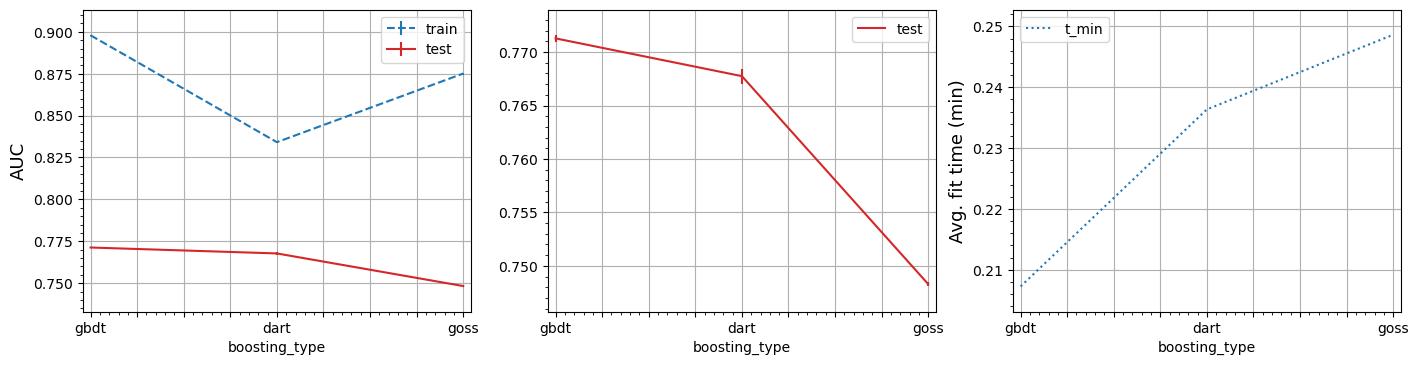

In [19]:
model = LGBMClassifier(random_state=123,n_jobs=-1)

grid = {'boosting_type': ['gbdt','dart','goss']}

l0 = model_tune(grid,'lgb_grid',fid=0,from_file=ff) # 1.5 min

plot_one_par(l0,'boosting_type')

##### 4.2.1.1.2 Parameters n_estimatiors and learning_rate <a id='4.2.1.1.2'></a>

In [28]:
def plot_scaled(grid_res,par1,par2,logx=False,ymin=0,swap_legend=False):

    r = pd.DataFrame(grid_res.cv_results_)
    r.columns = r.columns.str.replace('param_','').str.replace('_score','').str.replace('mean_','')
    r['t_min'] = r['fit_time']/60.  
#   r['n_estimators * learning_rate'] = r['n_estimators'] * r['learning_rate']

    if '*' in par1:
        r[par1] = r[par1.split('*')[0].strip()] * r[par2]
    
    fig, ax = plt.subplots(1,3,figsize=(17,4))

    c = ['C8','C3','C2','C0','C4','C1']
    
    grouped = r.groupby(par2)
    if swap_legend:   
        grouped = r.sort_values(par2,ascending=False).groupby(par2,sort=False)

    for i, (key, group) in enumerate(grouped):
    
        group.plot(par1,'train',yerr='std_train',label='train, {} = {}'.format(par2,key),c=c[i],ls='--'
                   ,marker='o',markersize=4,ax=ax[0])
        group.plot(par1,'test' ,yerr='std_test' ,label='test , {} = {}'.format(par2,key),c=c[i]
                   ,marker='o',markersize=4,ax=ax[1])
        group.plot(par1,'t_min', label='{} = {}'.format(par2,key),ls='-.',c=c[i]
                   ,marker='o',markersize=4,ax=ax[2])

    ax[0].set_ylabel('AUC',fontsize=13)
    ax[2].set_ylabel('Avg. fit time (min)',fontsize=13)
    
    if ymin > 0: 
        for ai in ax[:-1]: ai.set_ylim(bottom=ymin)
        
    if logx:
        for ai in ax: ai.set_xscale("log")
            
    for ai in ax:
        ai.legend(loc='best',fontsize=9)

In [36]:
ff=True

In [23]:
np.array([100,200,400,700,1000,2000,])*0.01/100

array([0.01, 0.02, 0.04, 0.07, 0.1 , 0.2 ])

In [103]:
model = LGBMClassifier(random_state=123,n_jobs=-1)

grid = {'n_estimators': [100, 200, 400, 700, 1000, 2000, 5000],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l1 = model_tune(grid,'lgb_grid',fid=1,from_file=ff) # 153 min

0.0 min elapsed


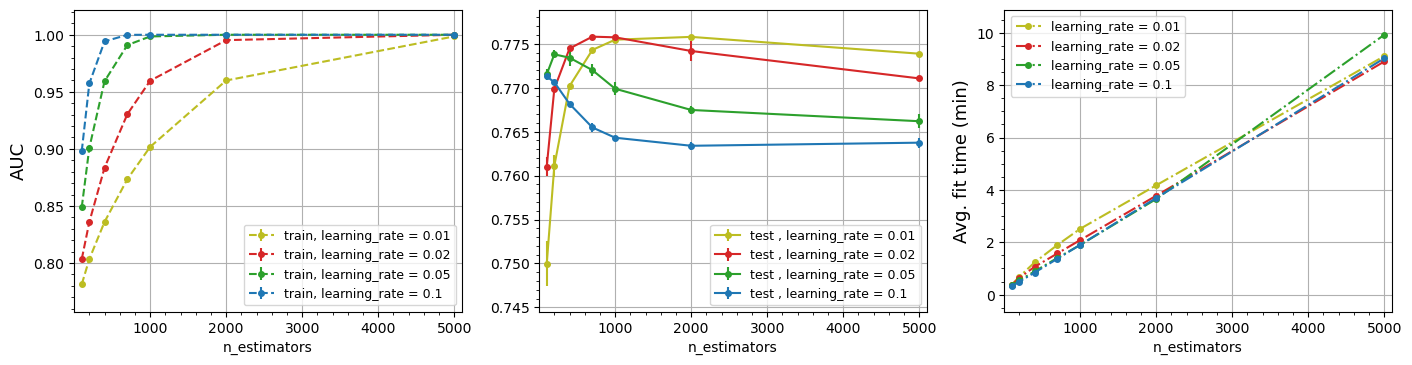

In [110]:
plot_scaled(l1,'n_estimators','learning_rate')

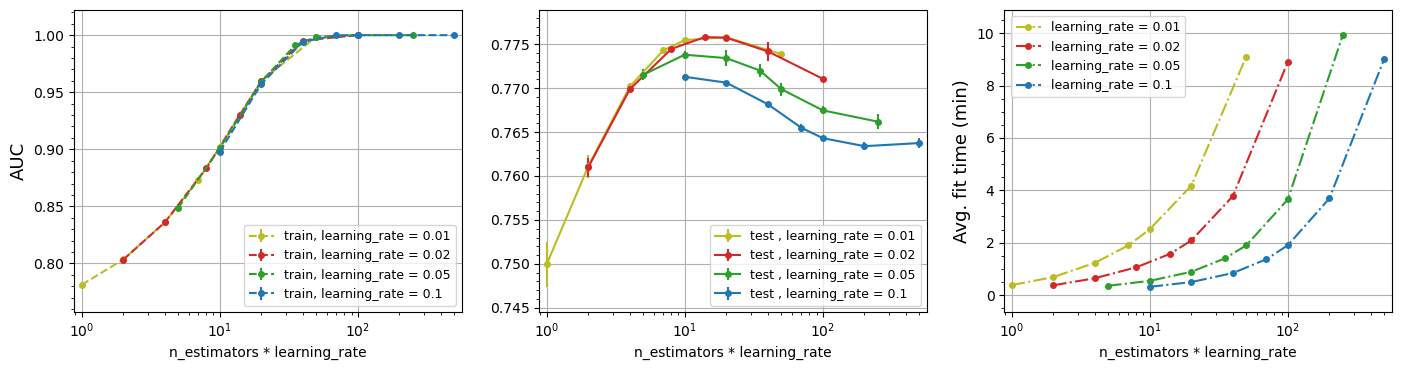

In [72]:
plot_scaled(l1,'n_estimators * learning_rate','learning_rate',logx=True)

##### 4.2.1.1.3 Parameter num_leaves and learning rate<a id='4.2.1.1.3'></a>

In [69]:
ff=True

In [28]:
model = LGBMClassifier(random_state=123,n_jobs=-1)

grid = {'num_leaves': [4, 8, 16, 32, 64, 128],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l2 = model_tune(grid,'lgb_grid',fid=2,from_file=ff) # 13.2 min

0.0 min elapsed


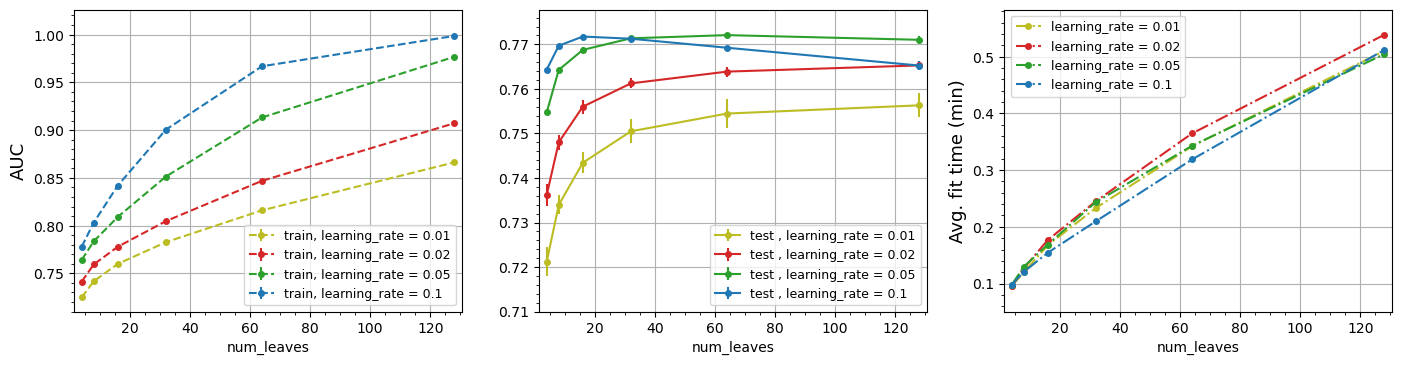

In [72]:
plot_scaled(l2,'num_leaves','learning_rate',ymin=0.71)

In [29]:
model = LGBMClassifier(n_estimators=2000,random_state=123,n_jobs=-1)

grid = {'num_leaves': [4, 8, 16, 32, 64, 128],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l21 = model_tune(grid,'lgb_grid',fid=21,from_file=ff) # 146 min

0.0 min elapsed


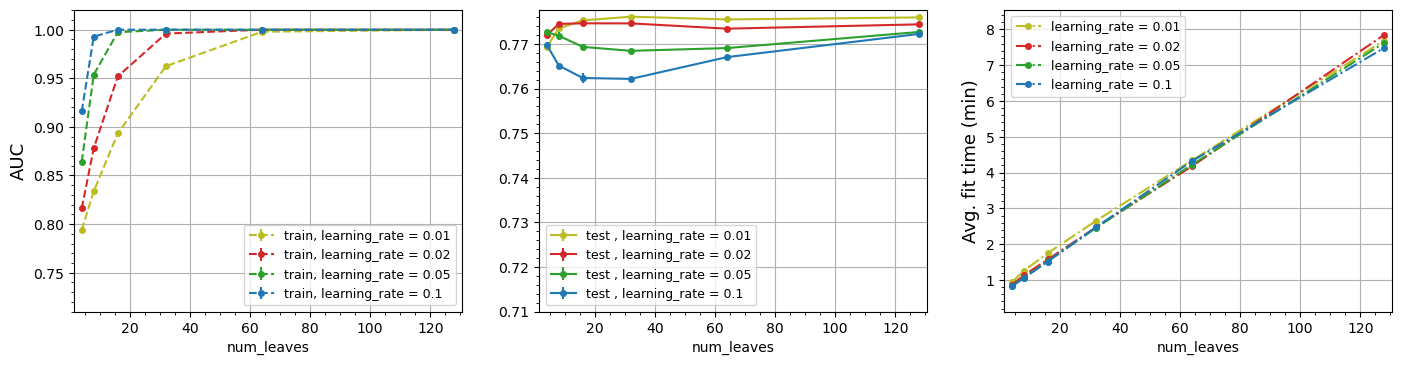

In [74]:
plot_scaled(l21,'num_leaves','learning_rate',ymin=0.71)

##### 4.2.1.1.4 Parameters colsample_bytree and  feature_fraction_bynode<a id='4.2.1.1.4'></a>

In [302]:
np.array([0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1])*1880

array([  37.6,   94. ,  188. ,  282. ,  376. ,  564. ,  752. , 1128. ,
       1504. , 1880. ])

0.0 min elapsed


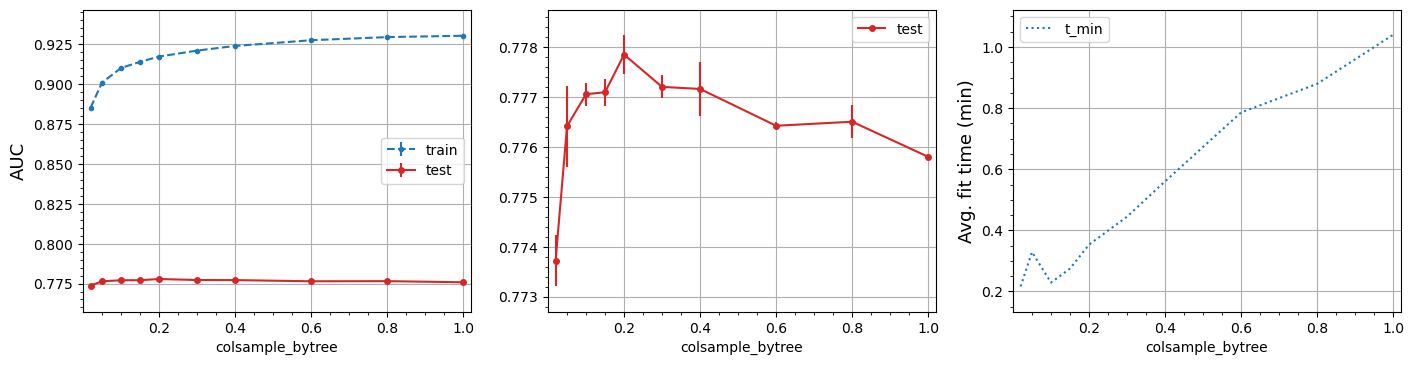

In [30]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,random_state=123,n_jobs=-1)
grid = {'colsample_bytree': [0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1]}

r3 = model_tune(grid,'lgb_grid',fid=3,from_file=ff) #11 min elapsed

plot_one_par(r3,'colsample_bytree')#,ymin=0.76)

0.0 min elapsed


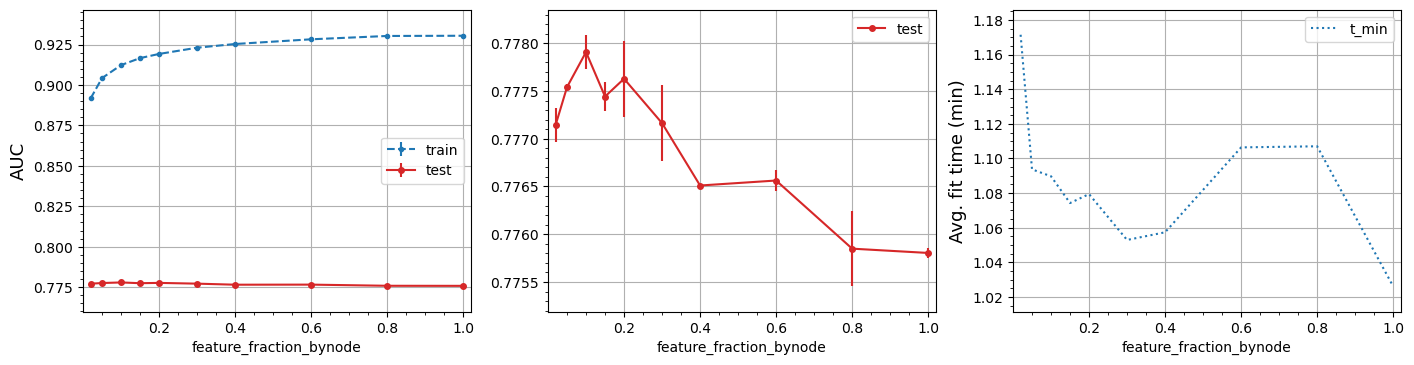

In [31]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,random_state=123,n_jobs=-1)
grid = {'feature_fraction_bynode': [0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1]}

r4 = model_tune(grid,'lgb_grid',fid=4,from_file=ff) #22.3 min elapsed

plot_one_par(r4,'feature_fraction_bynode')

0.0 min elapsed


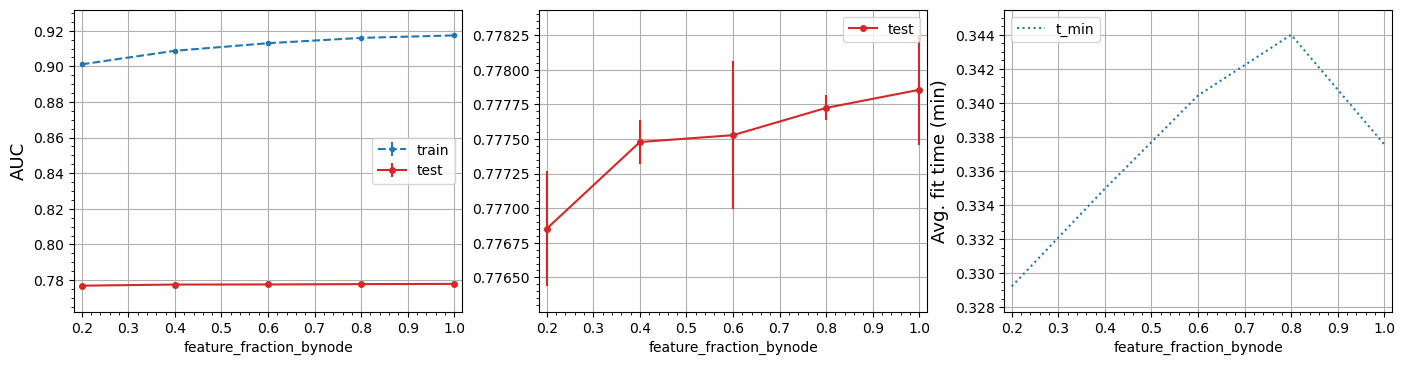

In [32]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,random_state=123,n_jobs=-1)
grid = {'feature_fraction_bynode': [0.2, 0.4, 0.6, 0.8, 1]}

r41 = model_tune(grid,'lgb_grid',fid=41,from_file=ff) #3.7 min elapsed

plot_one_par(r41,'feature_fraction_bynode')

##### 4.2.1.1.5 Parameter subsample <a id='4.2.1.1.5'></a>

0.0 min elapsed


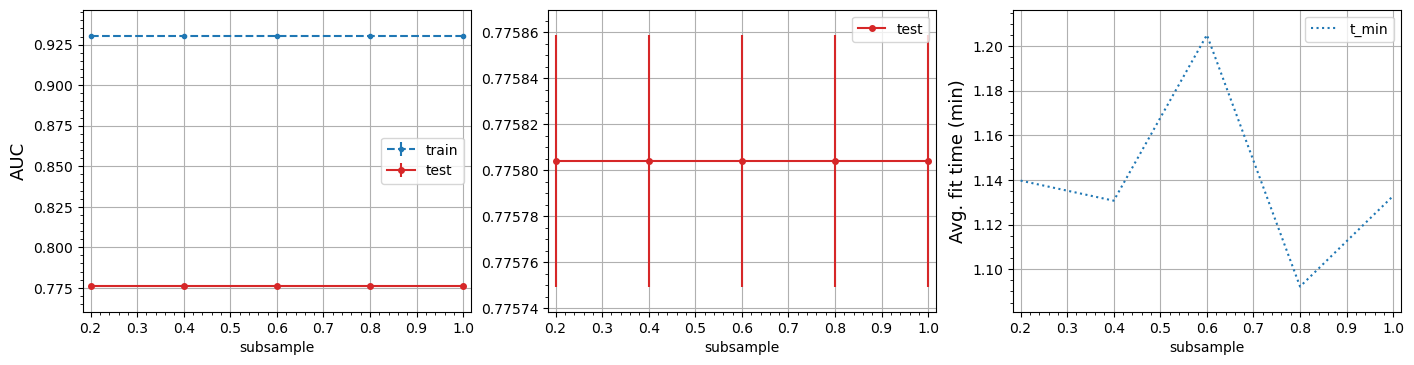

In [33]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,random_state=123,n_jobs=-1)
grid = {'subsample': [0.2, 0.4, 0.6, 0.8, 1]}

r5 = model_tune(grid,'lgb_grid',fid=5,from_file=ff) #12 min elapsed

plot_one_par(r5,'subsample')

##### 4.2.1.1.6 Parameters reg_lambda and reg_alpha <a id='4.2.1.1.6'></a>

In [314]:
np.logspace(np.log10(0.01),np.log10(500),10).round(2).astype('str')

array(['0.01', '0.03', '0.11', '0.37', '1.23', '4.08', '13.57', '45.16',
       '150.27', '500.0'], dtype='<U32')

0.0 min elapsed


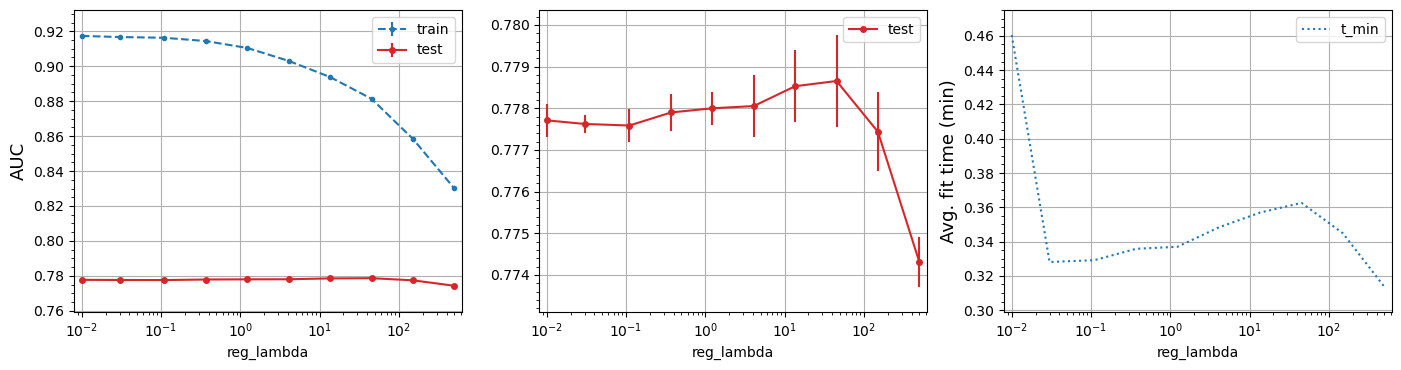

In [34]:
# L2
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,random_state=123,n_jobs=-1)
grid = {'reg_lambda': np.logspace(np.log10(0.01),np.log10(500),10).round(2)}

r6 = model_tune(grid,'lgb_grid',fid=6,from_file=ff) #7.7 min elapsed

plot_one_par(r6,'reg_lambda',logx=True)

0.0 min elapsed


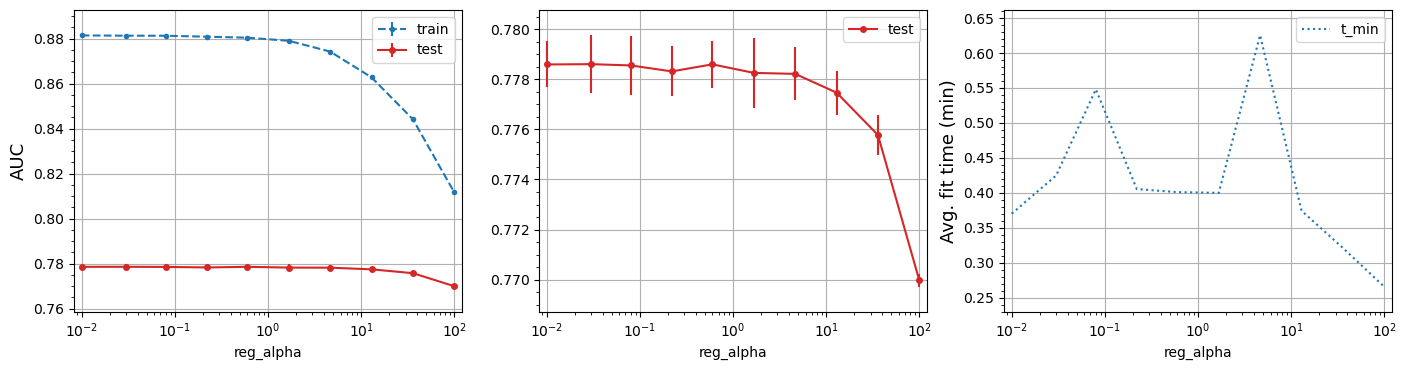

In [35]:
# L1
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'reg_alpha': np.logspace(np.log10(0.01),np.log10(100),10).round(2)}

r7 = model_tune(grid,'lgb_grid',fid=7,from_file=ff) #9 min elapsed

plot_one_par(r7,'reg_alpha',logx=True)

##### 4.2.1.1.7 Parameter min_child_samples<a id='4.2.1.1.7'></a>

In [325]:
np.logspace(np.log10(10),np.log10(2000),10).astype('int')

array([  10,   18,   32,   58,  105,  189,  341,  616, 1110, 2000])

0.0 min elapsed


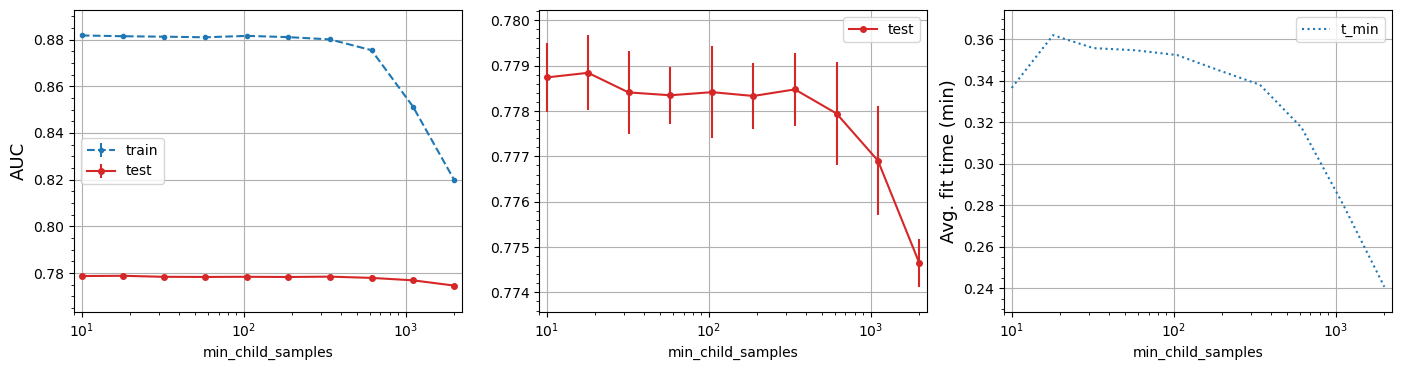

In [36]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'min_child_samples': np.logspace(np.log10(10),np.log10(2000),10).astype('int')}

r8 = model_tune(grid,'lgb_grid',fid=8,from_file=ff) #23.9 min elapsed

plot_one_par(r8,'min_child_samples',logx=True)

##### 4.2.1.1.8 Parameter min_data_in_bin<a id='4.2.1.1.8'></a>

In [ ]:
#min_data_in_bin = 3, min_data_in_bin > 0

In [328]:
np.logspace(np.log10(3),np.log10(1000),10).astype('int')

array([   3,    5,   10,   20,   39,   75,  144,  275,  524, 1000])

0.0 min elapsed


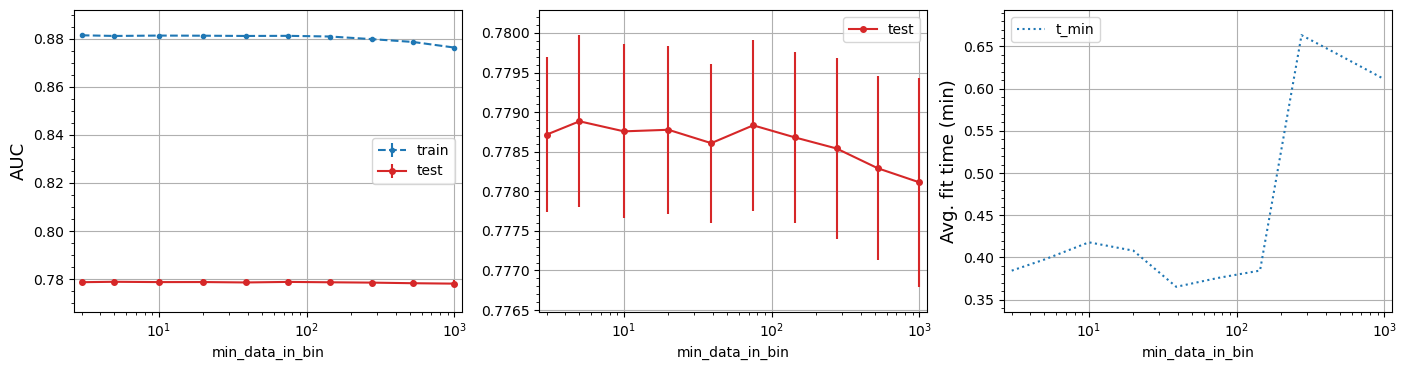

In [37]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'min_data_in_bin': np.logspace(np.log10(3),np.log10(1000),10).astype('int')}

r9 = model_tune(grid,'lgb_grid',fid=9,from_file=ff) #10 min elapsed

plot_one_par(r9,'min_data_in_bin',logx=True)

##### 4.2.1.1.9 Parameter max_bin<a id='4.2.1.1.9'></a>

In [38]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'max_bin': [127,255,511,1023,2047,4095]}

r10 = model_tune(grid,'lgb_grid',fid=10,from_file=ff) #7 min elapsed

0.0 min elapsed


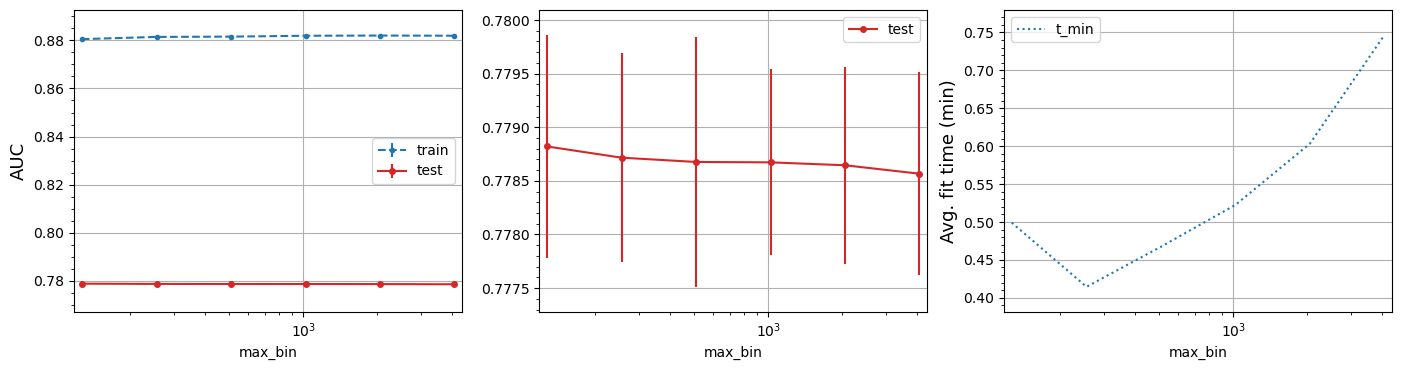

In [85]:
plot_one_par(r10,'max_bin',logx=True)

##### 4.2.1.1.10 Parameters is_unbalance and scale_pos_weight<a id='4.2.1.1.10'></a>

0.0 min elapsed


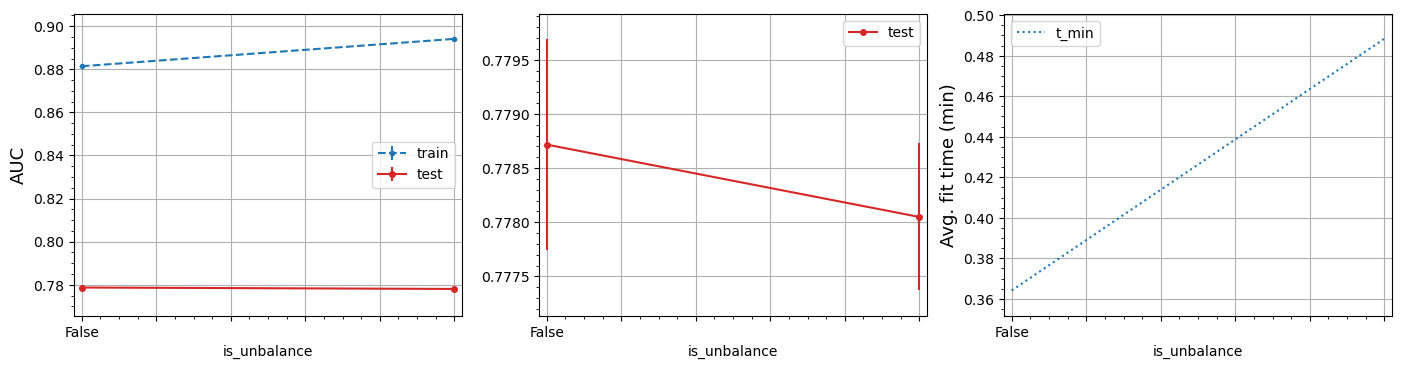

In [39]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'is_unbalance': [False,True]}

u1 = model_tune(grid,'lgb_grid_unb',fid=1,from_file=ff) #11 min elapsed

plot_one_par(u1,'is_unbalance')

0.0 min elapsed


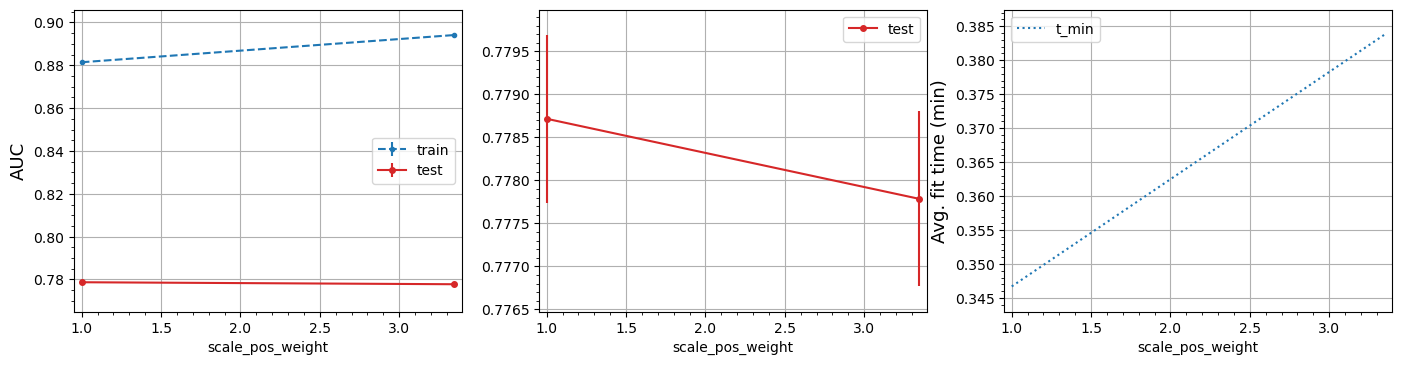

In [40]:
model = LGBMClassifier(learning_rate=0.02,n_estimators=700,colsample_bytree=0.2,reg_lambda=45,random_state=123,n_jobs=-1)
grid = {'scale_pos_weight': [1.,(1-0.23)/0.23]}

u2 = model_tune(grid,'lgb_grid_unb',fid=2,from_file=ff) #11 min elapsed

plot_one_par(u2,'scale_pos_weight')

#### 4.2.1.1.11 Result <a id='4.2.1.1.11'></a>

In [88]:
lgb_final = LGBMClassifier(learning_rate=0.02
                           ,n_estimators=700
                           ,num_leaves=40
                           ,colsample_bytree=0.2
                           ,reg_lambda=45
                           ,max_bin=127
                           ,random_state=123,n_jobs=-1)
lgb_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.2,
 'importance_type': 'split',
 'learning_rate': 0.02,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 700,
 'n_jobs': -1,
 'num_leaves': 40,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 45,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'max_bin': 127}

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

In [41]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_final.pkl', 'rb') as f: 
        lgb_final = pickle.load(f)
else:
    
    lgb_final.fit(X_train,y_train)
    
    with open('./data/lgb_final.pkl', 'wb') as f:
        pickle.dump(lgb_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 1.7 min elapsed

0.0 min elapsed


In [91]:
y_pred_proba_tr = lgb_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_final.predict_proba(X_test)[:,1]
y_pred          = lgb_final.predict(X_test)

roc_auc (train)=  0.83984
roc_auc (test) =  0.78835 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     27893
           1       0.65      0.30      0.41      8415

    accuracy                           0.80     36308
   macro avg       0.73      0.63      0.64     36308
weighted avg       0.78      0.80      0.77     36308



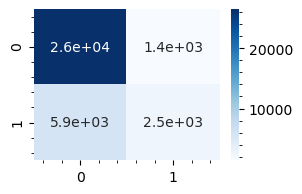

In [92]:
print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

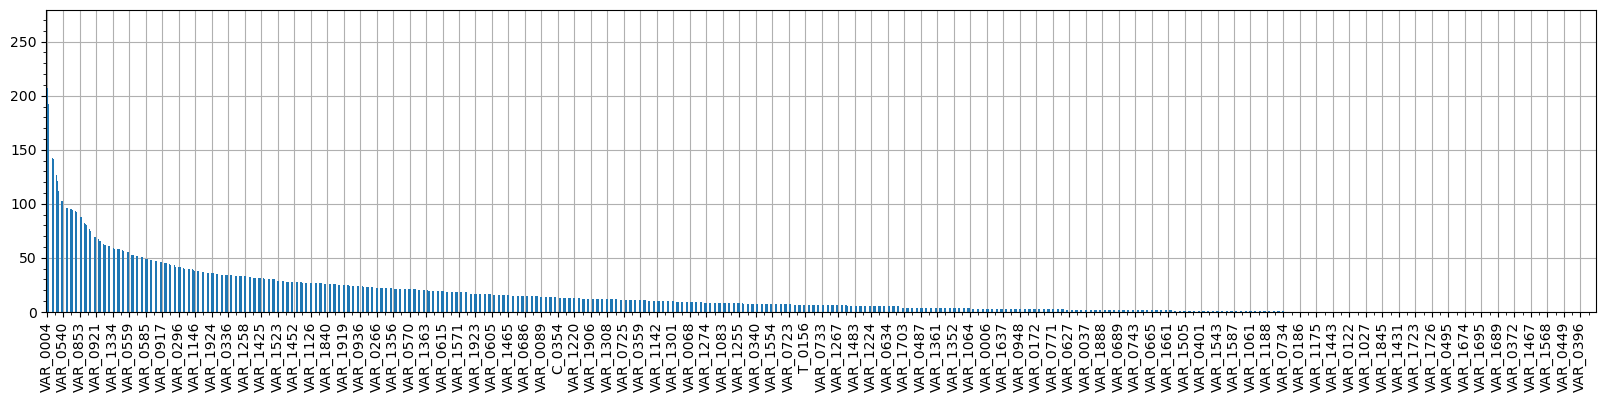

In [362]:
fi = pd.Series(lgb_final.feature_importances_, index=X.columns)
ax = fi.sort_values(ascending=False).plot(kind='bar',figsize=(20,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax.set_yscale('log')

In [363]:
fi.sort_values(ascending=False).reset_index().head(5)

index    0
0  VAR_0004  254
1  VAR_0003  207
2    C_0237  192
3  VAR_0241  164
4  VAR_0970  150

In [364]:
dfi = fi.sort_values(ascending=False).reset_index()
dfi[~dfi['index'].astype('str').str.contains('VAR')].head(10)

index    0
2    C_0237  192
15   C_1934  106
28   T_0217   95
35   C_0005   93
55    C_den   74
71    C_pop   62
125  C_0342   48
128  T_0075   48
149  T_0073   44
162  T_0179   42

#### 4.2.1.2 Reduced dataset 1 <a id='4.2.1.2'></a>

In [20]:
with open('./data/cols_LR_c0_01.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
X_reduced.shape

(145231, 359)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

In [22]:
ff = True

0.0 min elapsed


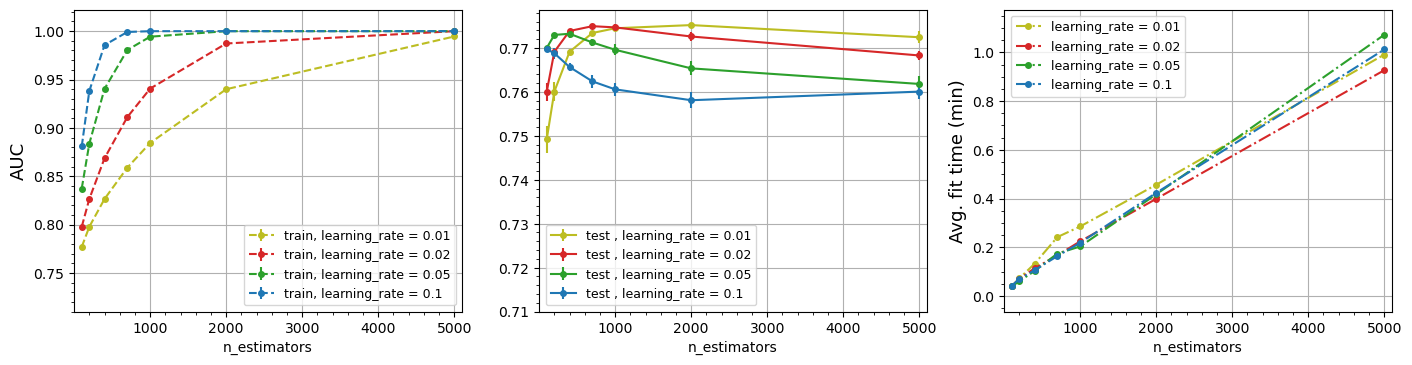

In [31]:
model = LGBMClassifier(random_state=123,n_jobs=-1)

grid = {'n_estimators': [100, 200, 400, 700, 1000, 2000, 5000],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l1 = model_tune(grid,'lgb_reduced',fid=1,from_file=ff) # 18.1 min

plot_scaled(l1,'n_estimators','learning_rate',ymin=0.71)

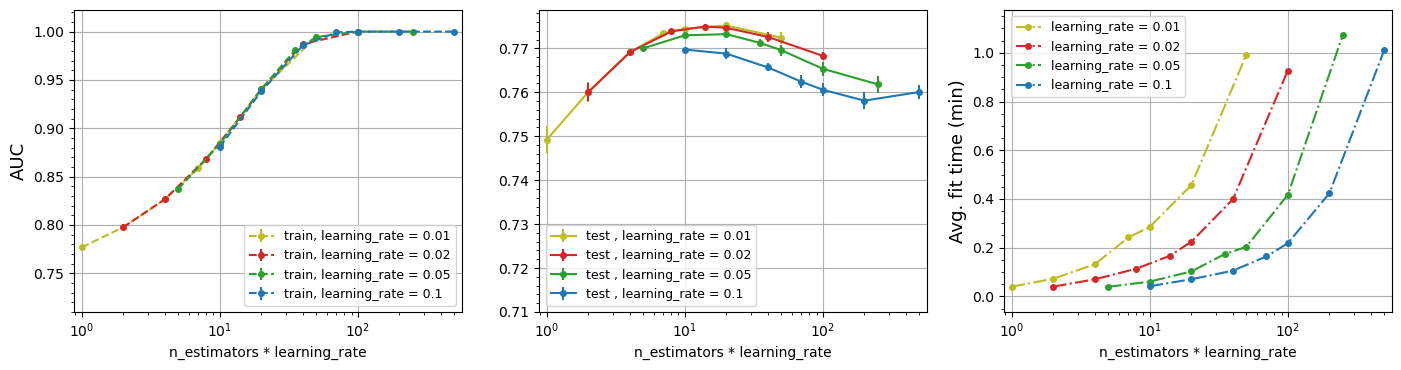

In [32]:
plot_scaled(l1,'n_estimators * learning_rate','learning_rate',ymin=0.71,logx=True)

0.0 min elapsed


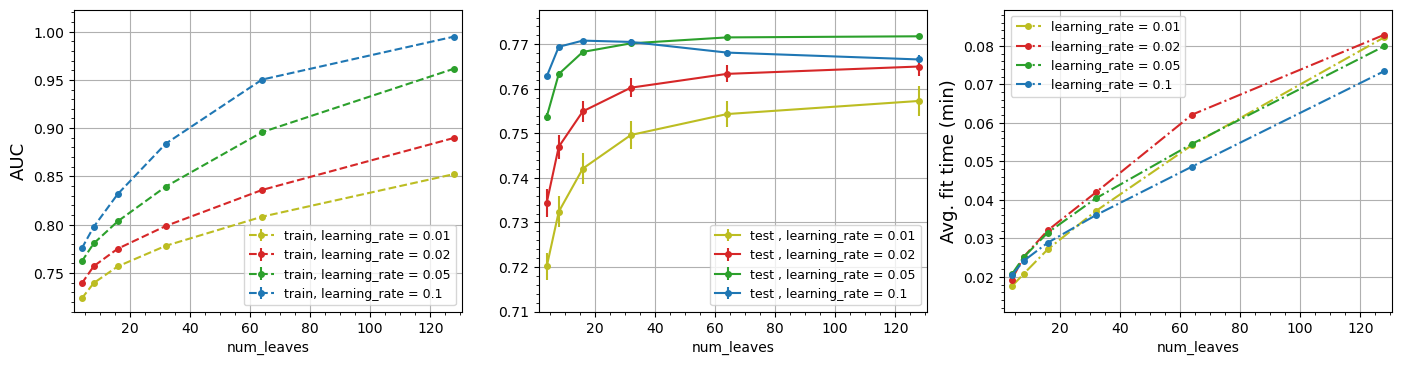

In [33]:
model = LGBMClassifier(random_state=123,n_jobs=-1)

grid = {'num_leaves': [4, 8, 16, 32, 64, 128],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l2 = model_tune(grid,'lgb_reduced',fid=2,from_file=ff) # 2.3 min

plot_scaled(l2,'num_leaves','learning_rate',ymin=0.71)

0.0 min elapsed


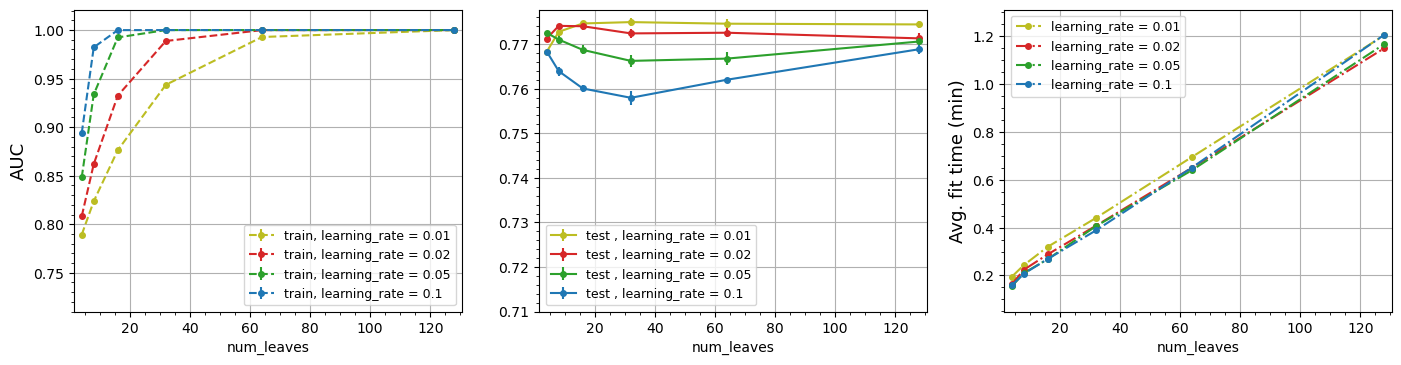

In [34]:
model = LGBMClassifier(n_estimators=2000,random_state=123,n_jobs=-1)

grid = {'num_leaves': [4, 8, 16, 32, 64, 128],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

l21 = model_tune(grid,'lgb_reduced',fid=21,from_file=ff) # 25 min

plot_scaled(l21,'num_leaves','learning_rate',ymin=0.71)

#### 4.2.2 Hyperparameter tuning (Bayesian optimization) <a id='4.2.2'></a>

##### 4.2.2.1 Reduced dataset 1 <a id='4.2.2.1'></a>

In [ ]:
with open('./data/cols_LR_c0_01.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
X_reduced.shape

In [10]:
2**15

32768

In [412]:
ff=True

In [10]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/lgbm_reduced_bayes_segmind.pkl', 'rb') as f: 
        opt = pickle.load(f)
else:

    lgbm = LGBMClassifier(random_state=123,n_jobs=24)#-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'num_leaves': Integer(16, 8192), #2^13
            'colsample_bytree': Real(0.2,1), #0.2*359 = 72
            'reg_lambda' : Real(0,100),
            'reg_alpha' :  Real(0,100),
            'min_child_samples' : Integer(5,1000)
            }

    opt = BayesSearchCV(lgbm,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)

    with open('./data/lgbm_reduced_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)

print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
#227.5 min = 3.8h 

val. score = 0.7800578687926423
Best parameters = OrderedDict([('colsample_bytree', 0.2), ('learning_rate', 0.007098094423516419), ('min_child_samples', 61), ('n_estimators', 8448), ('num_leaves', 3626), ('reg_alpha', 0.0), ('reg_lambda', 0.0)])
0.0 min elapsed


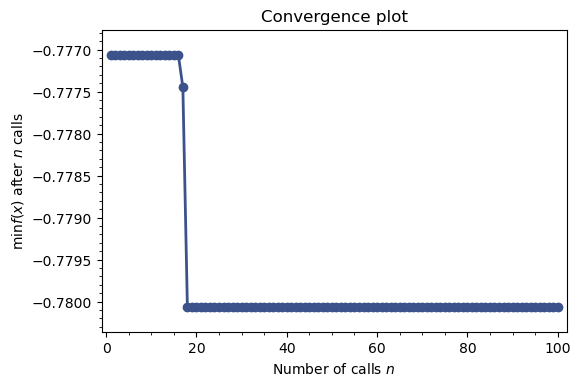

In [14]:
ax = plot_convergence(opt.optimizer_results_[0]);

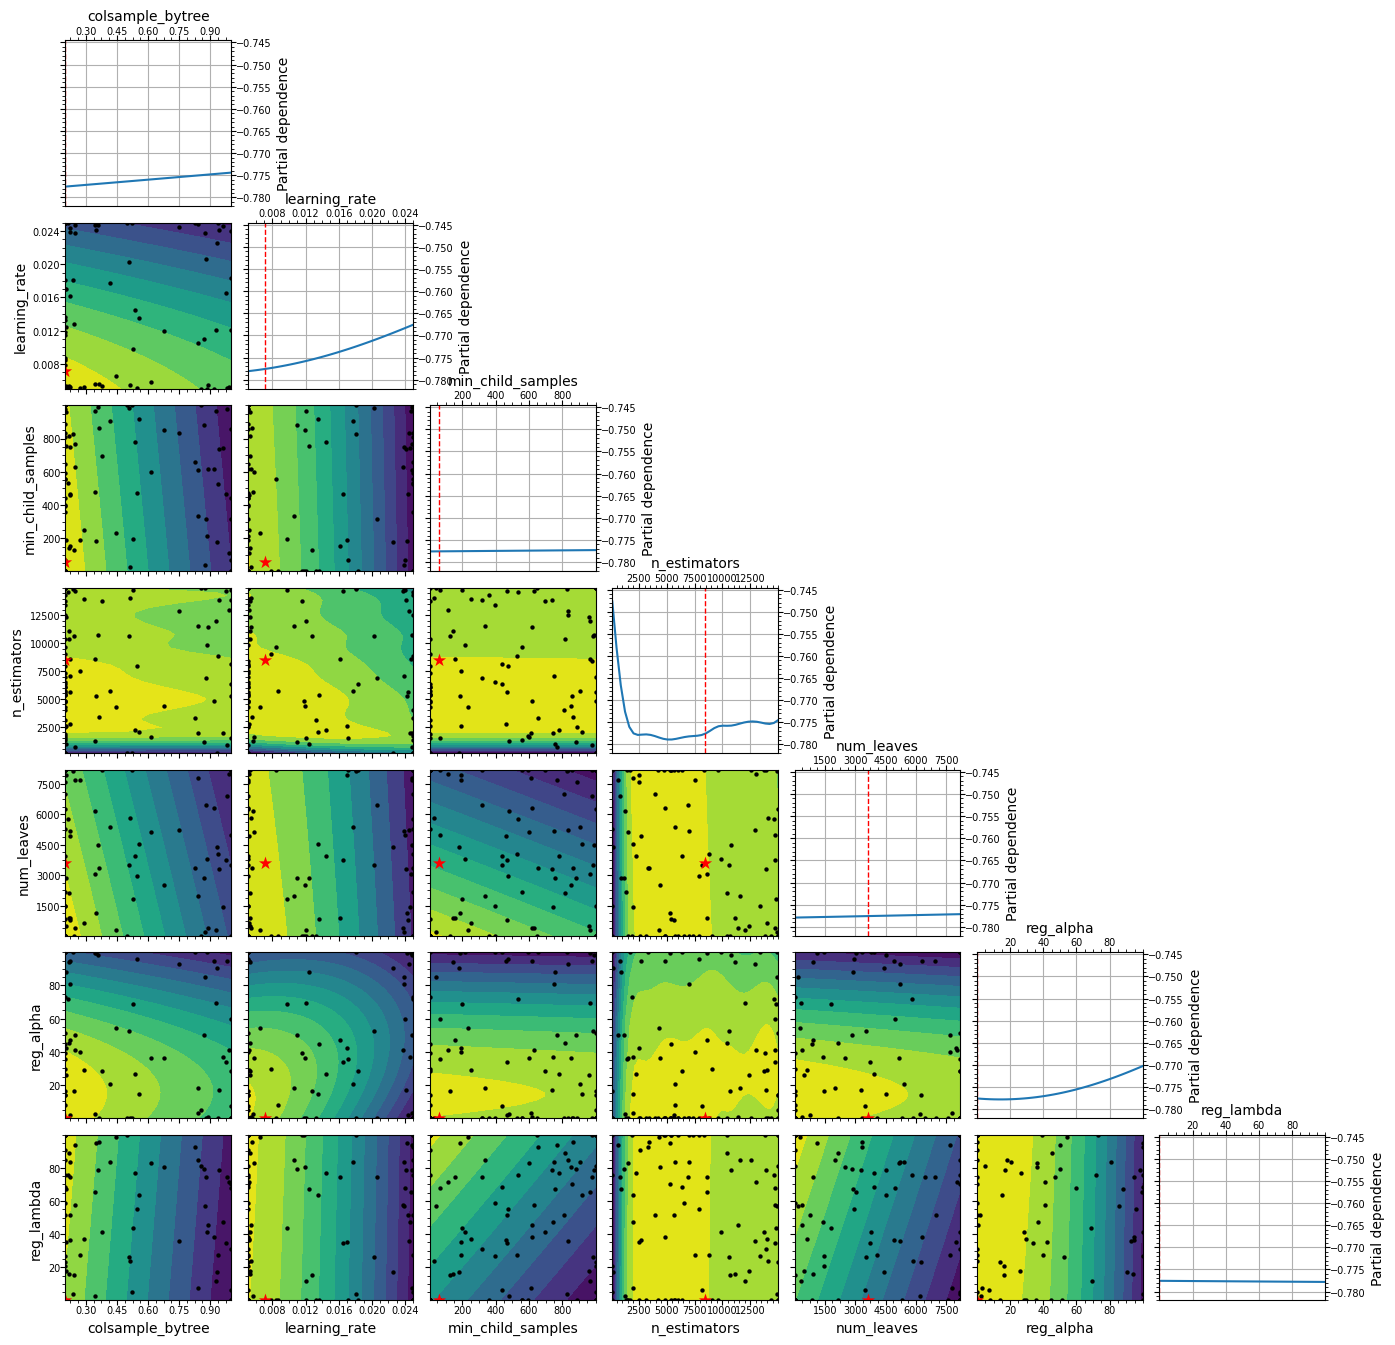

In [18]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [19]:
lgb_reduced_final = LGBMClassifier(learning_rate=0.007098094423516419
                                   ,n_estimators=8448
                                   ,num_leaves=3626
                                   ,colsample_bytree=0.2
                                   ,min_child_samples=61
                                   ,random_state=123,n_jobs=-1)
lgb_reduced_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.2,
 'importance_type': 'split',
 'learning_rate': 0.007098094423516419,
 'max_depth': -1,
 'min_child_samples': 61,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 8448,
 'n_jobs': -1,
 'num_leaves': 3626,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [20]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_reduced_final.pkl', 'rb') as f: 
        lgb_reduced_final = pickle.load(f)
else:
    
    lgb_reduced_final.fit(X_train,y_train)
    
    with open('./data/lgb_reduced_final.pkl', 'wb') as f:
        pickle.dump(lgb_reduced_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 29.8 min

29.8 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.7962 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.69      0.30      0.41      8415

    accuracy                           0.81     36308
   macro avg       0.76      0.63      0.65     36308
weighted avg       0.79      0.81      0.78     36308



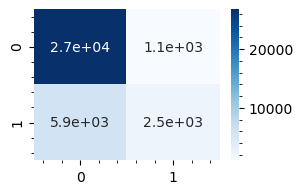

In [21]:
y_pred_proba_tr = lgb_reduced_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_reduced_final.predict_proba(X_test)[:,1]
y_pred          = lgb_reduced_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
#

##### 4.2.2.2 Reduced dataset 2 <a id='4.2.2.2'></a>

In [7]:
with open('./data/cols_LR_c0_02.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
X_reduced.shape

(145231, 569)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

In [9]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/lgbm_reduced2_bayes_segmind.pkl', 'rb') as f:
        opt = pickle.load(f)
else:

    lgbm = LGBMClassifier(random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'num_leaves': Integer(16, 8192), #2^13
            'colsample_bytree': Real(0.12,1), #0.12*569 = 70
            'min_child_samples' : Integer(5,500)
            }

    opt = BayesSearchCV(lgbm,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)
    
    with open('./data/lgbm_reduced2_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)
    
    
print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
# 1312 min

val. score = 0.7805827075509402
Best parameters = OrderedDict([('colsample_bytree', 0.25623522830381107), ('learning_rate', 0.005399221285694811), ('min_child_samples', 16), ('n_estimators', 8216), ('num_leaves', 7250)])
0.1 min elapsed


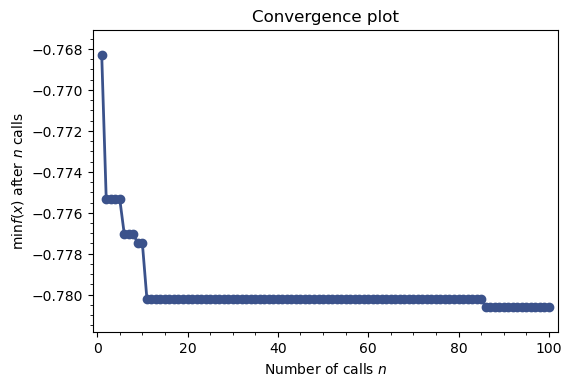

In [10]:
ax = plot_convergence(opt.optimizer_results_[0]);

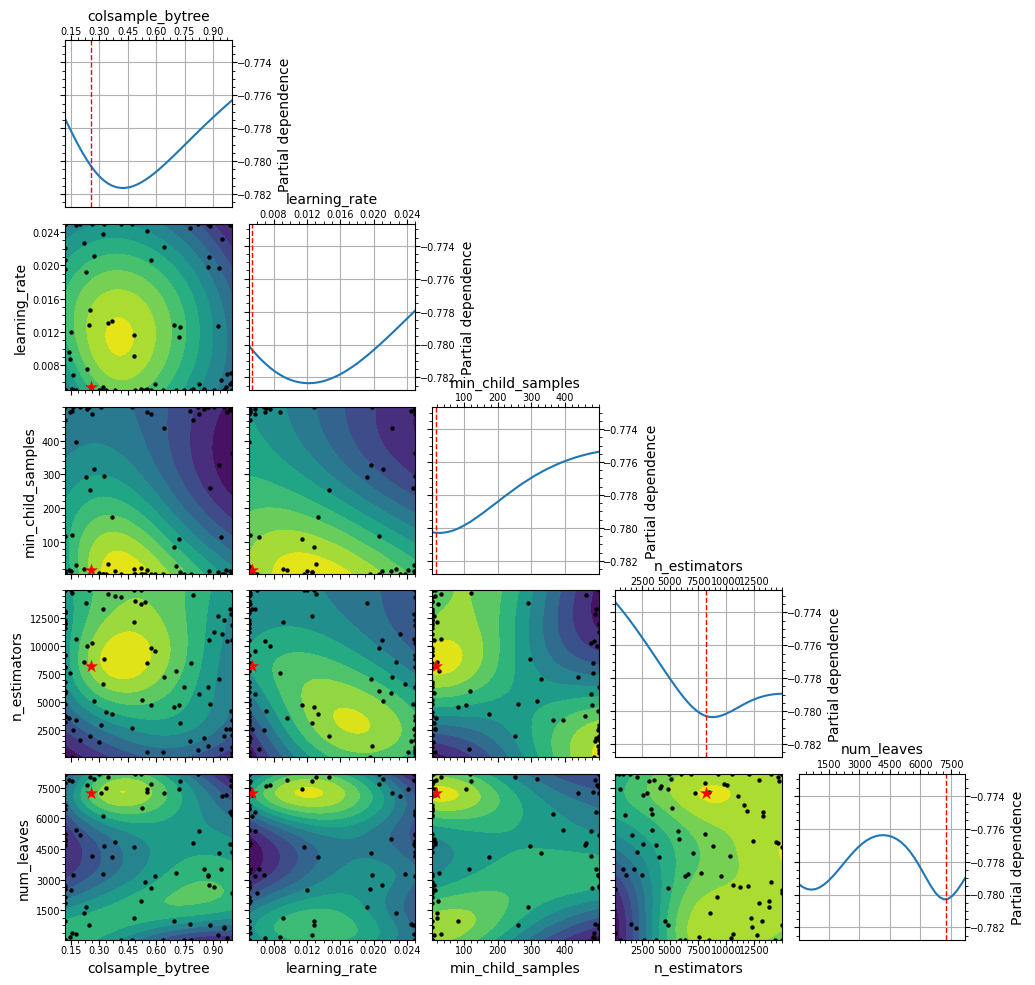

In [11]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [13]:
lgb_reduced2_final = LGBMClassifier(learning_rate=0.005399221285694811
                                   ,n_estimators=8216
                                   ,num_leaves=7250
                                   ,colsample_bytree=0.25623522830381107
                                   ,min_child_samples=16
                                   ,random_state=123,n_jobs=-1)
lgb_reduced2_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.25623522830381107,
 'importance_type': 'split',
 'learning_rate': 0.005399221285694811,
 'max_depth': -1,
 'min_child_samples': 16,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 8216,
 'n_jobs': -1,
 'num_leaves': 7250,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [14]:
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_reduced2_final.pkl', 'rb') as f: 
        lgb_reduced2_final = pickle.load(f)
else:
    
    lgb_reduced2_final.fit(X_train,y_train)
    
    with open('./data/lgb_reduced2_final.pkl', 'wb') as f:
        pickle.dump(lgb_reduced2_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
#45.2 local

45.2 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.79588 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     27893
           1       0.71      0.27      0.39      8415

    accuracy                           0.80     36308
   macro avg       0.76      0.62      0.64     36308
weighted avg       0.79      0.80      0.77     36308



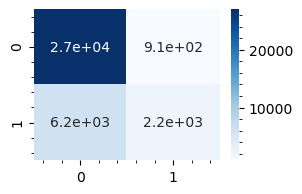

In [15]:
y_pred_proba_tr = lgb_reduced2_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_reduced2_final.predict_proba(X_test)[:,1]
y_pred          = lgb_reduced2_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
#

##### 4.2.2.3 Reduced dataset 3<a id='4.2.2.3'></a>

In [7]:
with open('./data/cols_RFE_lgbm.pkl', 'rb') as f:
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
print(X_reduced.shape)

(145231, 360)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

In [9]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/lgbm_reduced3_bayes.pkl', 'rb') as f:
        opt = pickle.load(f)
else:

    lgbm = LGBMClassifier(random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'num_leaves': Integer(16, 8192), #2^13
            'colsample_bytree': Real(0.2,1), #0.2*360=72
            'min_child_samples' : Integer(5,500)
            }

    opt = BayesSearchCV(lgbm,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)
    
    with open('./data/lgbm_reduced3_bayes.pkl', 'wb') as f:
        pickle.dump(opt, f)
    
    
print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
# 894.2 min 

val. score = 0.7824787088315409
Best parameters = OrderedDict([('colsample_bytree', 0.23429904662137188), ('learning_rate', 0.005135453451268273), ('min_child_samples', 30), ('n_estimators', 10046), ('num_leaves', 7583)])
0.1 min elapsed


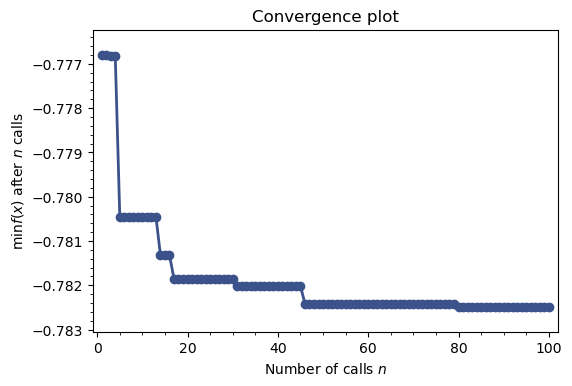

In [10]:
ax = plot_convergence(opt.optimizer_results_[0]);

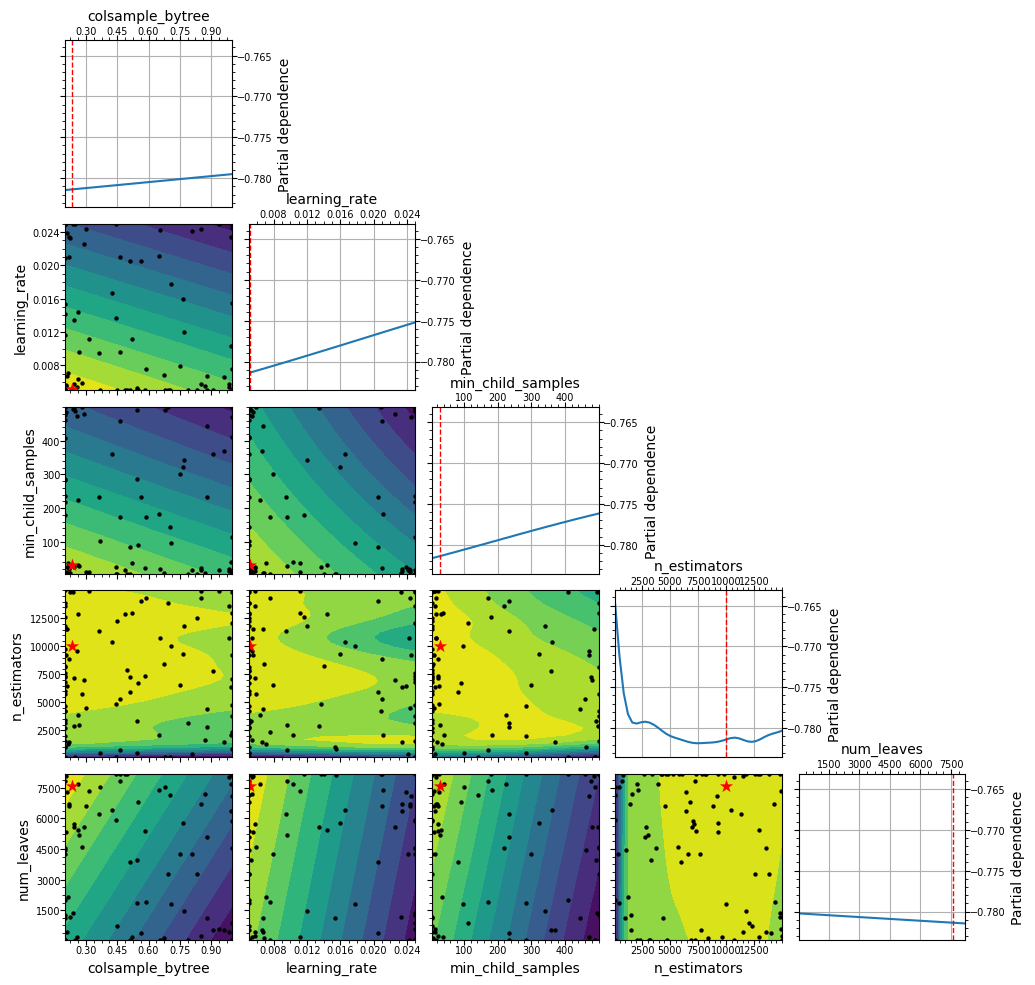

In [11]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [13]:
lgb_reduced3_final = LGBMClassifier(learning_rate=0.005135453451268273
                                   ,n_estimators=10046
                                   ,num_leaves=7583
                                   ,colsample_bytree=0.23429904662137188
                                   ,min_child_samples=30
                                   ,random_state=123,n_jobs=-1)
lgb_reduced3_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.23429904662137188,
 'importance_type': 'split',
 'learning_rate': 0.005135453451268273,
 'max_depth': -1,
 'min_child_samples': 30,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 10046,
 'n_jobs': -1,
 'num_leaves': 7583,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [14]:
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_reduced3_final.pkl', 'rb') as f: 
        lgb_reduced3_final = pickle.load(f)
else:
    
    lgb_reduced3_final.fit(X_train,y_train)
    
    with open('./data/lgb_reduced3_final.pkl', 'wb') as f:
        pickle.dump(lgb_reduced3_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
#48.5 min

40.5 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.79984 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.70      0.29      0.41      8415

    accuracy                           0.81     36308
   macro avg       0.76      0.62      0.64     36308
weighted avg       0.79      0.81      0.77     36308



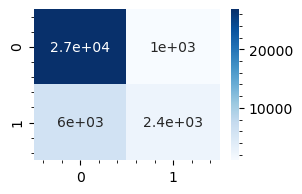

In [15]:
y_pred_proba_tr = lgb_reduced3_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_reduced3_final.predict_proba(X_test)[:,1]
y_pred          = lgb_reduced3_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
#

##### 4.2.2.4 Reduced dataset 4 <a id='4.2.2.4'></a>

In [7]:
with open('./data/cols_RFE_rf.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
print(X_reduced.shape)

(145231, 700)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

In [9]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/lgbm_reduced4_bayes_segmind.pkl', 'rb') as f:
        opt = pickle.load(f)
else:

    lgbm = LGBMClassifier(random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'num_leaves': Integer(16, 8192), #2^13
            'colsample_bytree': Real(0.1,1), #0.1*700 = 70
            'min_child_samples' : Integer(5,500)
            }

    opt = BayesSearchCV(lgbm,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)
    
    with open('./data/lgbm_reduced4_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)
    
    
print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
#1056 min

val. score = 0.7793698385466482
Best parameters = OrderedDict([('colsample_bytree', 0.5082115233664719), ('learning_rate', 0.005660629222876939), ('min_child_samples', 20), ('n_estimators', 14019), ('num_leaves', 1149)])
0.1 min elapsed


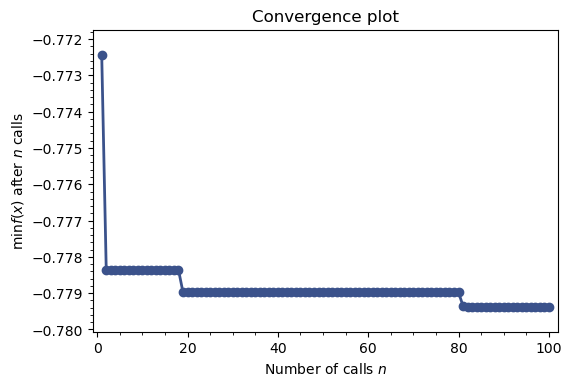

In [10]:
ax = plot_convergence(opt.optimizer_results_[0]);

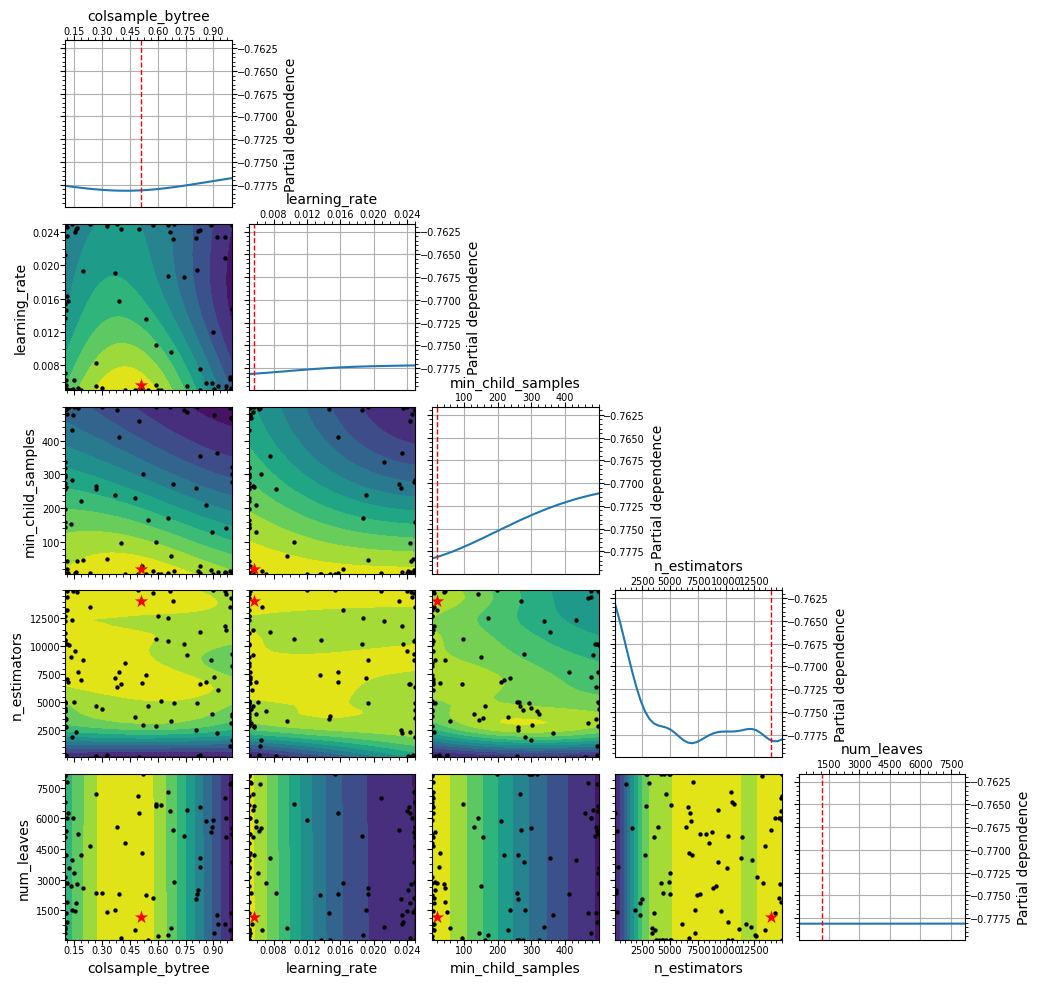

In [11]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [13]:
lgb_reduced4_final = LGBMClassifier(learning_rate=0.005660629222876939
                                   ,n_estimators=14019
                                   ,num_leaves=1149
                                   ,colsample_bytree=0.5082115233664719
                                   ,min_child_samples=20
                                   ,random_state=123,n_jobs=-1)
lgb_reduced4_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.5082115233664719,
 'importance_type': 'split',
 'learning_rate': 0.005660629222876939,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 14019,
 'n_jobs': -1,
 'num_leaves': 1149,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [14]:
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_reduced4_final.pkl', 'rb') as f: 
        lgb_reduced4_final = pickle.load(f)
else:
    
    lgb_reduced4_final.fit(X_train,y_train)
    
    with open('./data/lgb_reduced4_final.pkl', 'wb') as f:
        pickle.dump(lgb_reduced4_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
#189.3 local

189.3 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.7971 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.69      0.29      0.41      8415

    accuracy                           0.81     36308
   macro avg       0.75      0.63      0.65     36308
weighted avg       0.79      0.81      0.77     36308



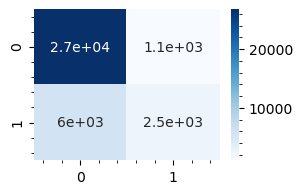

In [15]:
y_pred_proba_tr = lgb_reduced4_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_reduced4_final.predict_proba(X_test)[:,1]
y_pred          = lgb_reduced4_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
#

##### 4.2.2.5 Full dataset <a id='4.2.2.5'></a>

In [12]:
X = df
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

In [179]:
#for i,fmin in zip(opt.optimizer_results_[0]['x_iters'],opt.optimizer_results_[0]['func_vals']):
#    if i[3] > 6000 and i[3] < 10000:
##     if fmin>=-0.74:
#        print(i,'-f=',round(-fmin,3))

[0.7655678136215263, 0.011700338112025926, 351, 7524, 3663] -f= 0.77
[0.4040556226817711, 0.015202650119977679, 319, 9181, 2117] -f= 0.773
[0.6643759227385181, 0.024662871315013293, 46, 7650, 2188] -f= 0.77
[0.26648119838421763, 0.03, 5, 6088, 2477] -f= 0.778
[0.7909512081183585, 0.028528439353179932, 46, 7416, 223] -f= 0.778
[0.20206089628046442, 0.010752103075757928, 136, 9305, 16] -f= 0.778
[0.5442906335825218, 0.007130642661958312, 5, 7123, 16] -f= 0.777
[0.689708337351482, 0.005, 5, 6324, 8020] -f= 0.777
[0.623632934178562, 0.007678589993447508, 1000, 6582, 16] -f= 0.779
[0.925576186621438, 0.0275594659356932, 14, 6435, 92] -f= 0.778
[0.5805289134012483, 0.022012265463303805, 5, 8660, 8192] -f= 0.778
[0.613994595705828, 0.02417622882968935, 1000, 9139, 16] -f= 0.774
[0.6000545090945181, 0.02580288122301568, 5, 7149, 8192] -f= 0.778
[0.4090096541360229, 0.015832463969858233, 5, 7028, 8192] -f= 0.777
[0.31013721076466744, 0.025842846170742347, 1000, 7339, 8192] -f= 0.778
[1.0, 0.005

In [ ]:
#full segmind

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

In [10]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/lgbm_full_bayes_segmind.pkl', 'rb') as f:
        opt = pickle.load(f)
else:

    lgbm = LGBMClassifier(random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'num_leaves': Integer(16, 8192), #2^13
            'colsample_bytree': Real(0.04,1),
            'min_child_samples' : Integer(5,500)
            }

    opt = BayesSearchCV(lgbm,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)
    
    with open('./data/lgbm_full_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)
    
    
print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
# 1704.4 min elapsed, 28.4 h

val. score = 0.7808085872028908
Best parameters = OrderedDict([('colsample_bytree', 0.23265424499433532), ('learning_rate', 0.005910967511118184), ('min_child_samples', 57), ('n_estimators', 4215), ('num_leaves', 1319)])
0.0 min elapsed


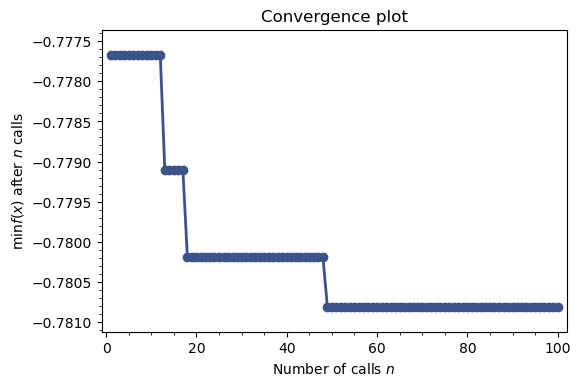

In [11]:
ax = plot_convergence(opt.optimizer_results_[0]);

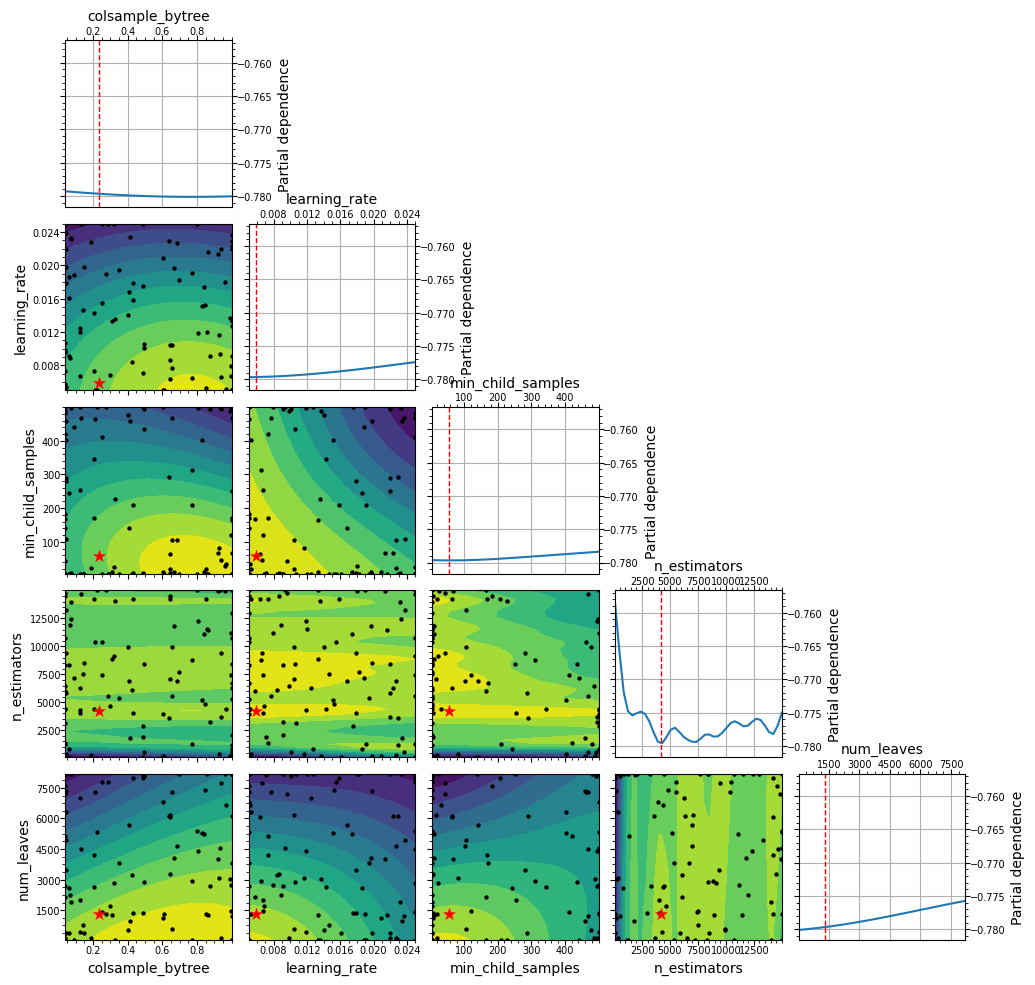

In [12]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

In [16]:
lgb_full_final = LGBMClassifier(learning_rate=0.005910967511118184
                                   ,n_estimators=4215
                                   ,num_leaves=1319
                                   ,colsample_bytree=0.23265424499433532
                                   ,min_child_samples=57
                                   ,random_state=123,n_jobs=-1)
lgb_full_final.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.23265424499433532,
 'importance_type': 'split',
 'learning_rate': 0.005910967511118184,
 'max_depth': -1,
 'min_child_samples': 57,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 4215,
 'n_jobs': -1,
 'num_leaves': 1319,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [17]:
from_file = False
#from_file = True

t1 = dt.now()

if from_file:
    with open('./data/lgb_full_final.pkl', 'rb') as f: 
        lgb_full_final = pickle.load(f)
else:
    
    lgb_full_final.fit(X_train,y_train)
    
    with open('./data/lgb_full_final.pkl', 'wb') as f:
        pickle.dump(lgb_full_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 50.4 min elapsed

50.4 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.79851 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.69      0.29      0.41      8415

    accuracy                           0.80     36308
   macro avg       0.75      0.62      0.64     36308
weighted avg       0.79      0.80      0.77     36308



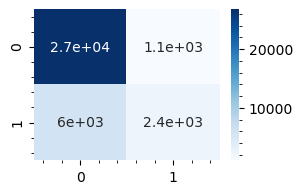

In [18]:
y_pred_proba_tr = lgb_full_final.predict_proba(X_train)[:,1]
y_pred_proba    = lgb_full_final.predict_proba(X_test)[:,1]
y_pred          = lgb_full_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

### 4.3 XGBoost Classifier <a id='4.3'></a>

In [12]:
model = XGBClassifier(random_state=123,n_jobs=-1)
model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### 4.3.1 Hyperparameter tuning (one iteration, manual), full dataset <a id='4.3.1'></a>

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

In [97]:
ff=False

0.0 min elapsed


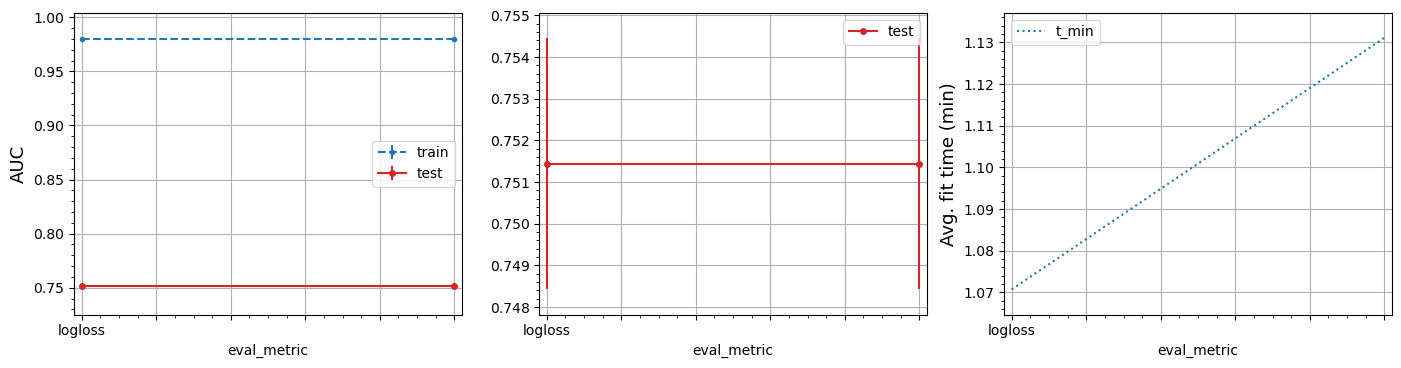

In [42]:
model = XGBClassifier(use_label_encoder=False,random_state=123,n_jobs=-1)

grid = {'eval_metric': ['logloss','auc']}

xm1 = model_tune(grid,'xgb_grid',fid=-1,from_file=ff) # 5.0 min

plot_one_par(xm1,'eval_metric')

0.0 min elapsed


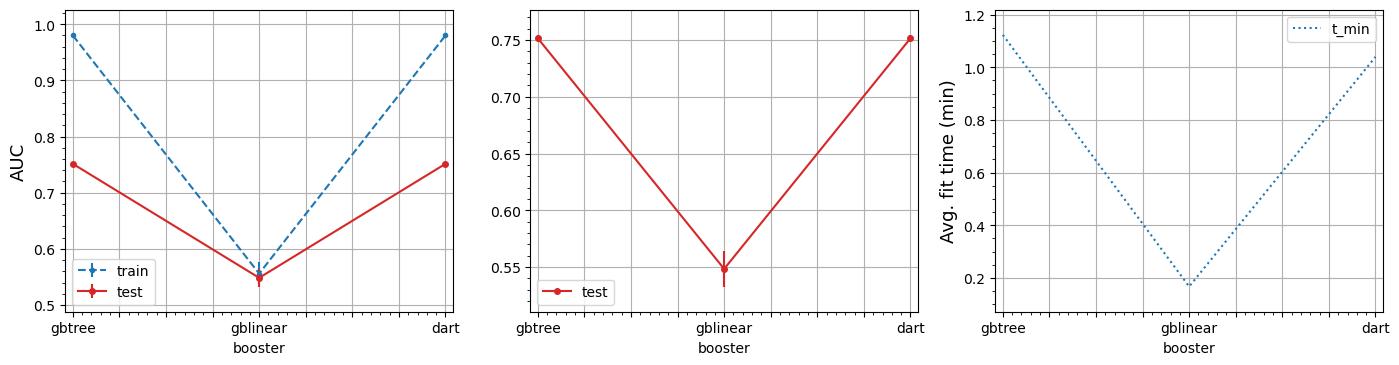

In [43]:
model = XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'booster': ['gbtree','gblinear','dart']}

x0 = model_tune(grid,'xgb_grid',fid=0,from_file=ff) # 5.0 min

plot_one_par(x0,'booster')

In [44]:
model = XGBClassifier(tree_method='hist'
                      ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'n_estimators': [100, 200, 400, 700, 1000, 2000],
        'learning_rate': [0.01, 0.02, 0.05, 0.1]}

x1 = model_tune(grid,'xgb_grid',fid=1,from_file=ff) # 284 min

0.0 min elapsed


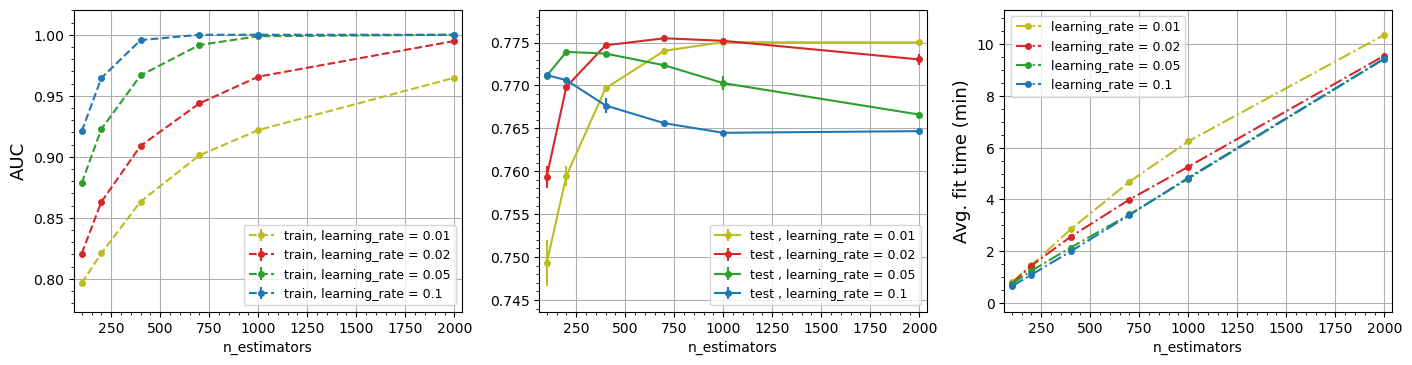

In [99]:
plot_scaled(x1,'n_estimators','learning_rate')

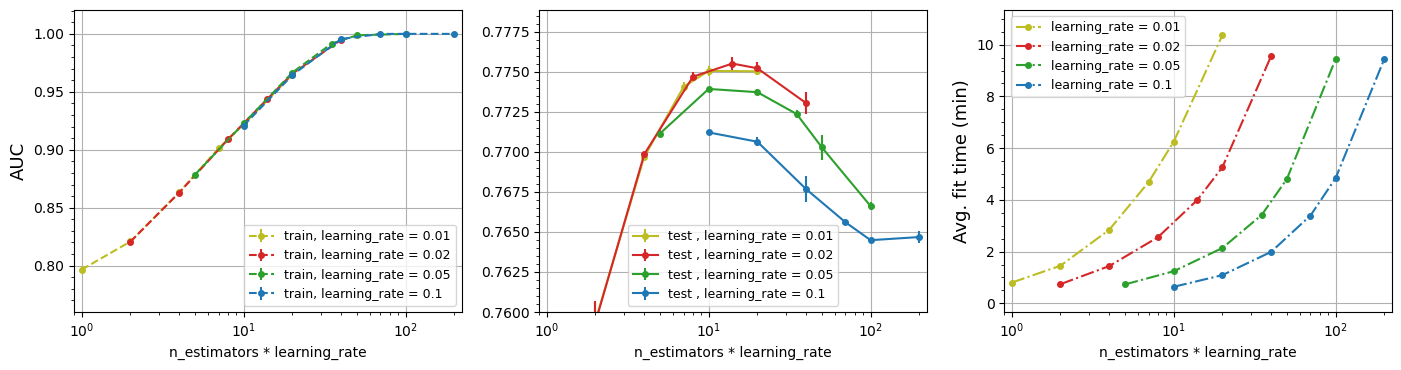

In [100]:
plot_scaled(x1,'n_estimators * learning_rate','learning_rate',logx=True,ymin=0.76)

In [ ]:
# max_depth 

0.0 min elapsed


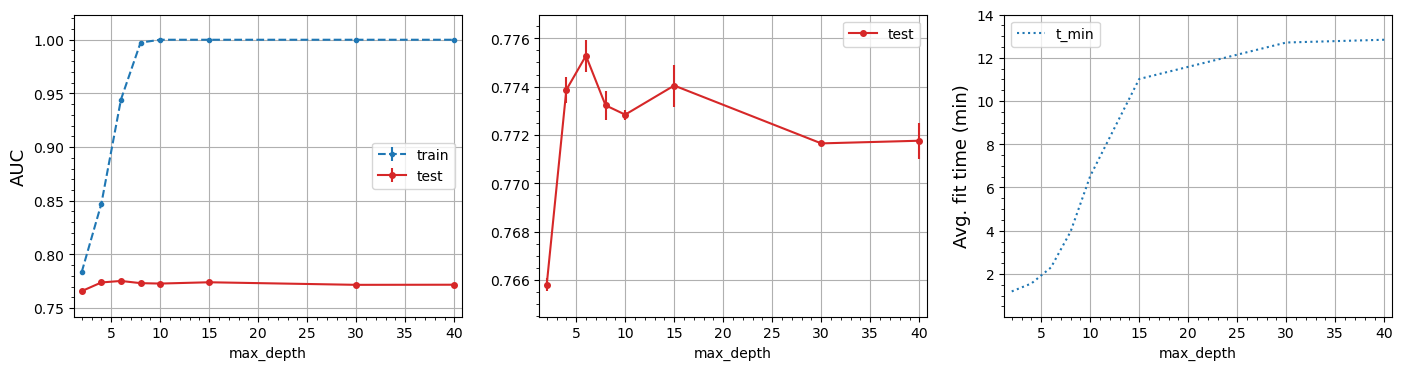

In [45]:
model = XGBClassifier(tree_method='hist',learning_rate=0.035,n_estimators=400
                      ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'max_depth': [2, 4, 6, 8, 10, 15, 30, 40]}

x2 = model_tune(grid,'xgb_grid',fid=2,from_file=ff) # 250. min

plot_one_par(x2,'max_depth')

In [ ]:
#colsample_bytree

In [385]:
np.array([0.02, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1])*1880

array([  37.6,   94. ,  188. ,  282. ,  376. ,  564. ,  752. , 1128. ,
       1504. , 1880. ])

0.0 min elapsed


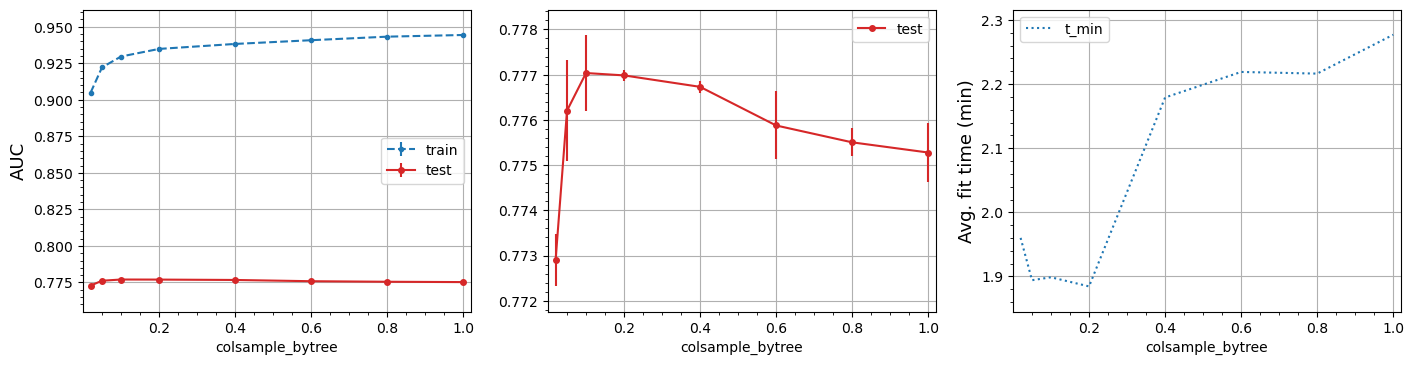

In [46]:
model = XGBClassifier(tree_method='hist',learning_rate=0.035,n_estimators=400
                      ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'colsample_bytree': [0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]}

x3 = model_tune(grid,'xgb_grid',fid=3,from_file=ff) #33,5 min elapsed

plot_one_par(x3,'colsample_bytree')

0.0 min elapsed


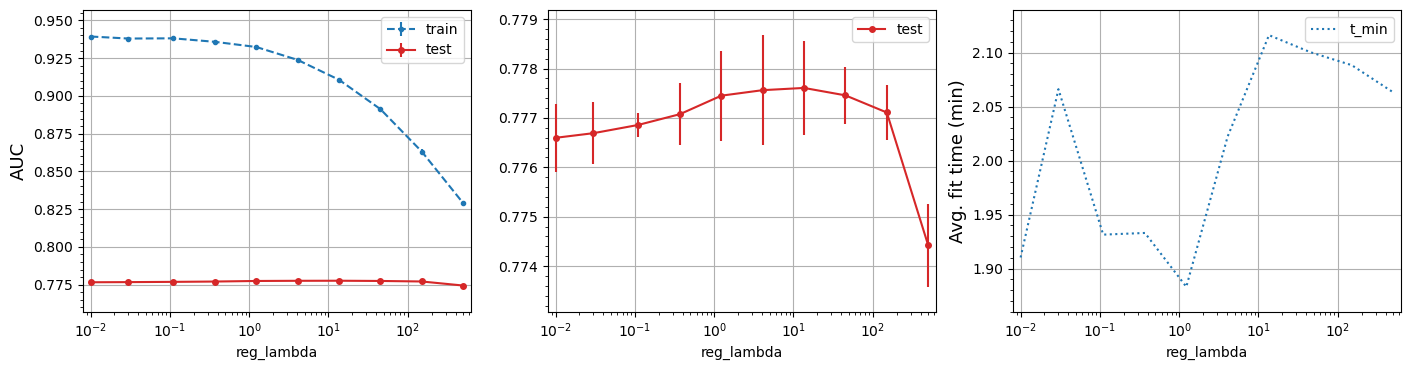

In [47]:
# L2
model = XGBClassifier(tree_method='hist',learning_rate=0.035,n_estimators=400,colsample_bytree=0.15
                      ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'reg_lambda': np.logspace(np.log10(0.01),np.log10(500),10).round(2)}

x4 = model_tune(grid,'xgb_grid',fid=4,from_file=ff) #40.8 min elapsed

plot_one_par(x4,'reg_lambda',logx=True)

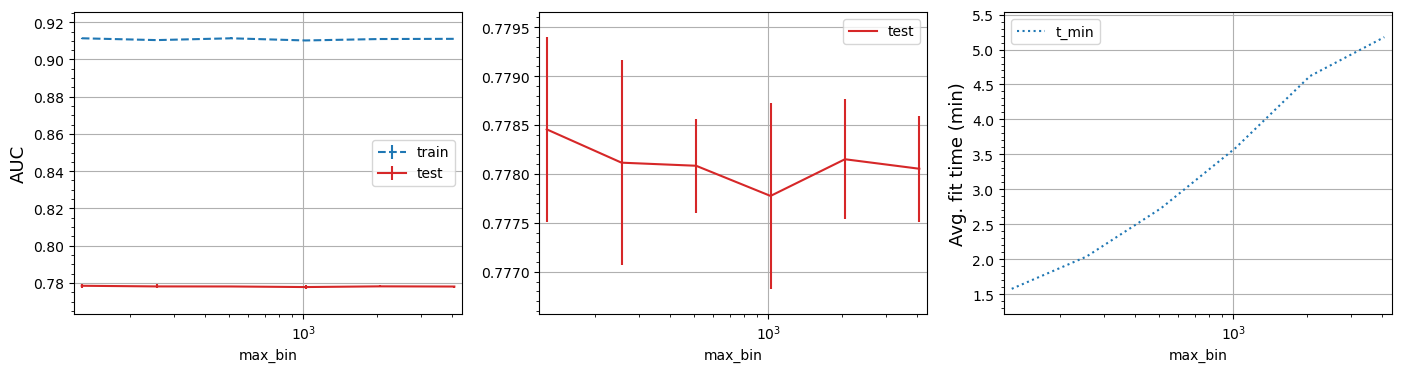

In [398]:
model = XGBClassifier(tree_method='hist',learning_rate=0.035,n_estimators=400,colsample_bytree=0.15
                      ,reg_lambda=14,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'max_bin': [127,255,511,1023,2047,4095]}

x5 = model_tune(grid,'xgb_grid',fid=5,from_file=ff) #39.8 min elapsed

plot_one_par(x5,'max_bin',logx=True)

In [ ]:
### !!!!!!!!!!!!!!!!
### reduce train and maintain test
model = XGBClassifier(tree_method='hist',learning_rate=0.035,n_estimators=400,colsample_bytree=0.15
                      ,reg_lambda=14,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)

grid = {'gamma': [0, 0.1, 1.,10.,15.]}

x6 = model_tune(grid,'xgb_grid',fid=6,from_file=ff) #17.5 min elapsed

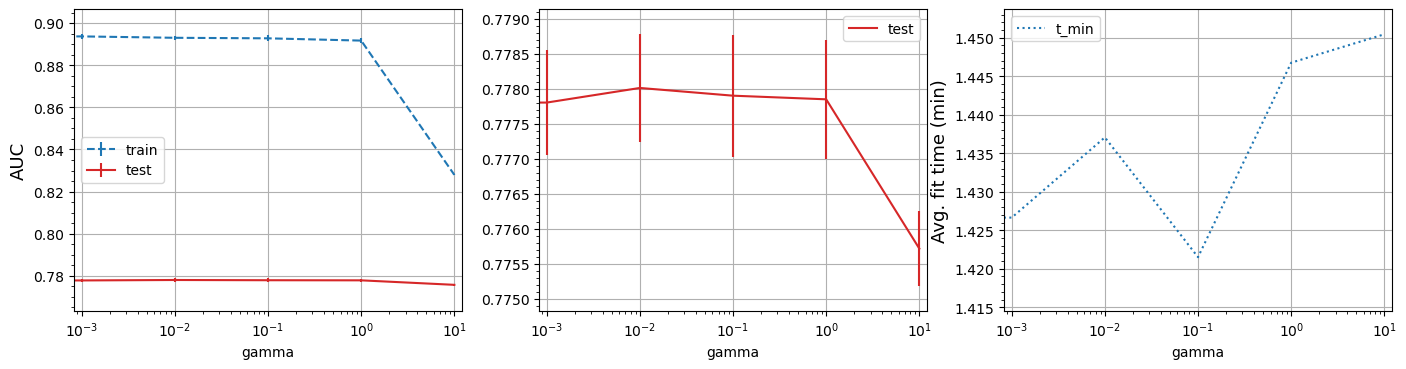

In [392]:
plot_one_par(x6,'gamma')

In [399]:
xgb_final = XGBClassifier(tree_method='hist'
                          ,learning_rate=0.035
                          ,n_estimators=400
                          ,colsample_bytree=0.15
                          ,reg_lambda=14
                          ,max_bin=127
                          ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)
xgb_final.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.15,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.035,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': 14,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None,
 'max_bin': 127,
 'eval_metric': 'logloss'}

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

In [14]:
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/xgb_final.pkl', 'rb') as f: 
        xgb_final = pickle.load(f)
else:
    
    xgb_final.fit(X_train,y_train)
    
    with open('./data/xgb_final.pkl', 'wb') as f:
        pickle.dump(xgb_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 3.6 min elapsed

0.0 min elapsed


In [15]:
y_pred_proba_tr = xgb_final.predict_proba(X_train)[:,1]
y_pred_proba    = xgb_final.predict_proba(X_test)[:,1]
y_pred          = xgb_final.predict(X_test)

roc_auc (train)=  0.84763
roc_auc (test) =  0.78678 

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     27893
           1       0.65      0.29      0.40      8415

    accuracy                           0.80     36308
   macro avg       0.73      0.62      0.64     36308
weighted avg       0.78      0.80      0.77     36308



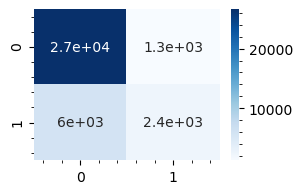

In [16]:
print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

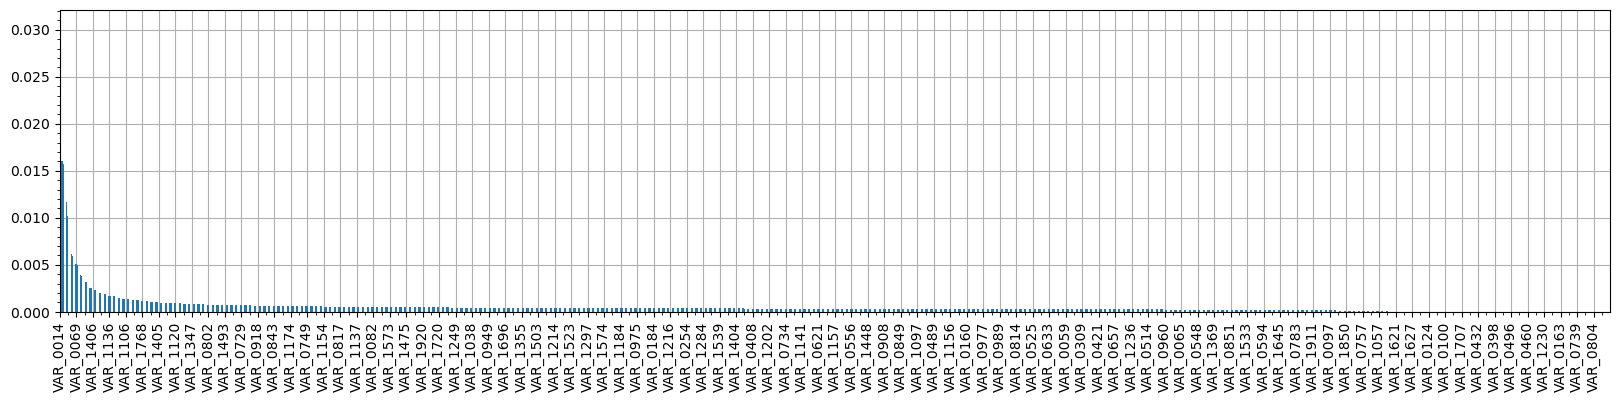

In [17]:
fi = pd.Series(xgb_final.feature_importances_, index=X.columns)
ax = fi.sort_values(ascending=False).plot(kind='bar',figsize=(20,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax.set_yscale('log')

In [18]:
fi.sort_values(ascending=False).reset_index().head(5)

index         0
0  VAR_0014  0.029190
1  VAR_0088  0.019832
2  VAR_0087  0.016026
3  VAR_0137  0.016005
4  VAR_0070  0.015696

In [19]:
dfi = fi.sort_values(ascending=False).reset_index()
dfi[~dfi['index'].astype('str').str.contains('VAR')].head(10)

index         0
7    T_0073  0.013940
18      T_n  0.005678
42   C_1934  0.002370
63   C_0005  0.001672
91   C_0237  0.001250
282  T_0176  0.000621
308  T_0179  0.000591
350  C_n2_O  0.000546
452  C_0354  0.000477
470  C_0283  0.000469

#### 4.3.2 Hyperparameter tuning (Bayesian optimization) <a id='4.3.2'></a>

##### 4.3.2.1 Reduced dataset 1 <a id='4.3.2.1'></a>

In [ ]:
with open('./data/cols_LR_c0_01.pkl', 'rb') as f:    
    cols_reduced = pickle.load(f)
    
X_reduced = X[cols_reduced]
X_reduced.shape

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.5,random_state=123)

In [10]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/xgb_reduced_bayes_segmind.pkl', 'rb') as f: 
        opt = pickle.load(f)
else:

    xgb = XGBClassifier(tree_method='hist',reg_lambda=0.,reg_alpha=0,
                        eval_metric='logloss',random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'max_depth': Integer(3, 30),
            'colsample_bytree': Real(0.2,1), #0.2*359 = 72
            'min_child_weight' : Integer(5,500)
            }

    opt = BayesSearchCV(xgb,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)

    with open('./data/xgb_reduced_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)

print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
#266 min

val. score = 0.7805499633504541
Best parameters = OrderedDict([('colsample_bytree', 0.2), ('learning_rate', 0.005), ('max_depth', 30), ('min_child_weight', 5), ('n_estimators', 3247)])
0.2 min elapsed


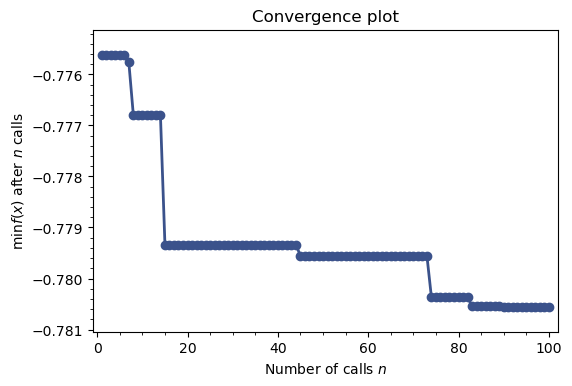

In [13]:
ax = plot_convergence(opt.optimizer_results_[0]);

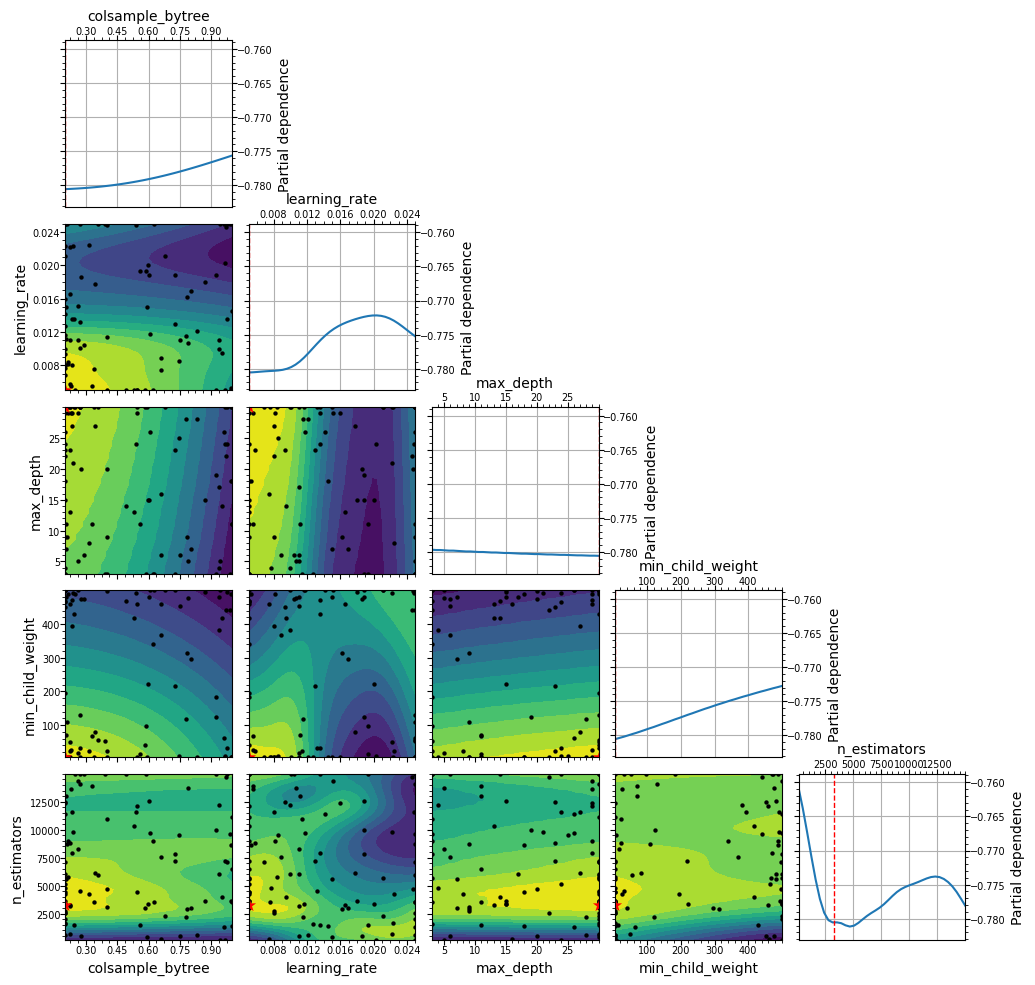

In [11]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

In [11]:
xgb_reduced_final = XGBClassifier(tree_method='hist'
                          ,learning_rate=0.005
                          ,n_estimators=3247
                          ,max_depth=30
                          ,colsample_bytree=0.2
                          ,min_child_weight=5
                          ,reg_lambda=0.,reg_alpha=0
                          ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)
#xgb_reduced_final.get_params()

In [12]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/xgb_reduced_final.pkl', 'rb') as f: 
        xgb_reduced_final = pickle.load(f)
else:
    
    xgb_reduced_final.fit(X_train,y_train)
    
    with open('./data/xgb_reduced_final.pkl', 'wb') as f:
        pickle.dump(xgb_reduced_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
# 251.4 min elapsed = 4.1h
# 5.5 min on segmind

0.2 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.79372 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.70      0.29      0.41      8415

    accuracy                           0.81     36308
   macro avg       0.76      0.62      0.65     36308
weighted avg       0.79      0.81      0.77     36308



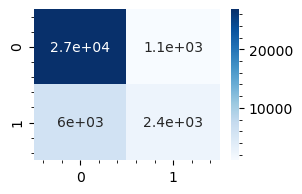

In [13]:
y_pred_proba_tr = xgb_reduced_final.predict_proba(X_train)[:,1]
y_pred_proba    = xgb_reduced_final.predict_proba(X_test)[:,1]
y_pred          = xgb_reduced_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

##### 4.3.2.2 Full dataset<a id='4.3.2.2'></a>

In [ ]:
#full

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.5,random_state=123)

In [19]:
from_file = True

t1 = dt.now()

opt = 0

if from_file:
    with open('./data/xgb_full_bayes_segmind.pkl', 'rb') as f: 
        opt = pickle.load(f)
else:

    xgb = XGBClassifier(tree_method='hist',reg_lambda=0.,reg_alpha=0,
                        eval_metric='logloss',random_state=123,n_jobs=-1)

    grid = {'learning_rate' : Real(0.005,0.025),
            'n_estimators' : Integer(100, 15000),
            'max_depth': Integer(3, 30),
            'colsample_bytree': Real(0.2,1), #0.2*359 = 72
            'min_child_weight' : Integer(5,500)
            }

    opt = BayesSearchCV(xgb,search_spaces=grid,scoring='roc_auc',return_train_score=True
                        ,verbose=2,cv=2,n_iter=100)

    opt.fit(X_train, y_train)

    with open('./data/xgb_full_bayes_segmind.pkl', 'wb') as f:
        pickle.dump(opt, f)

print('val. score =',opt.best_score_)
print('Best parameters =',opt.best_params_)

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
# 1499 min = 24.9h

val. score = 0.7805041217118645
Best parameters = OrderedDict([('colsample_bytree', 0.2682617725980561), ('learning_rate', 0.005084797132636652), ('max_depth', 47), ('min_child_weight', 5), ('n_estimators', 3136)])
0.1 min elapsed


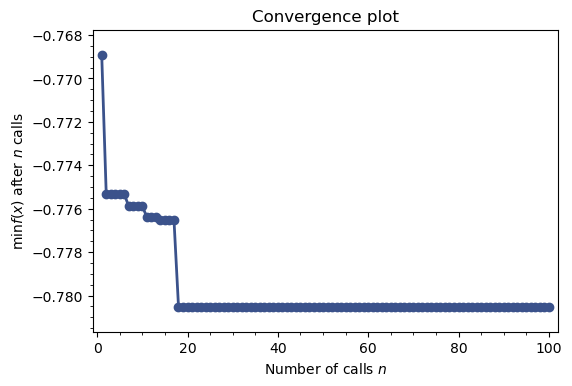

In [20]:
ax = plot_convergence(opt.optimizer_results_[0]);

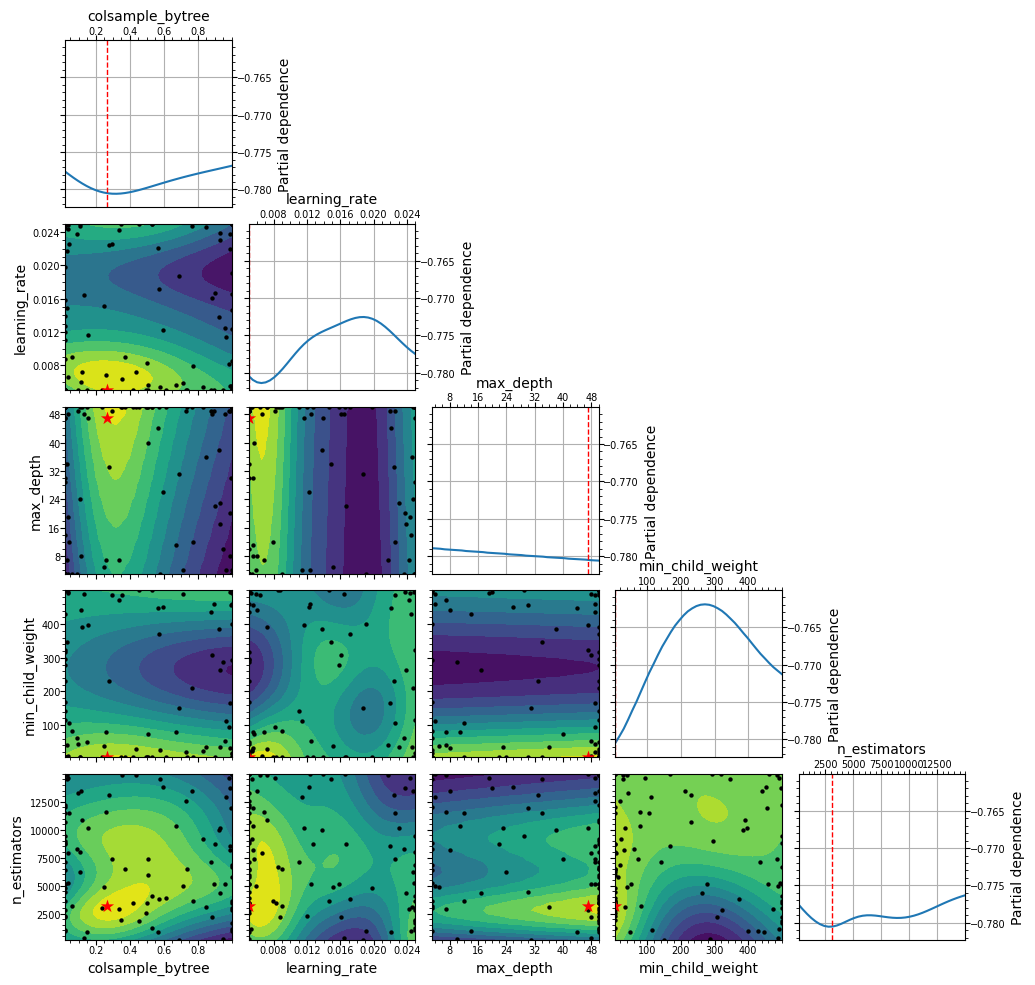

In [21]:
ax = plot_objective(opt.optimizer_results_[0],sample_source='result')

for ai in ax.ravel():
    ai.tick_params(axis='both', which='major', labelsize=7,rotation=0,pad=0)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

In [ ]:
del X

In [ ]:
del y

In [11]:
del df

In [16]:
xgb_full_final = XGBClassifier(tree_method='hist'
                          ,learning_rate=0.005084797132636652
                          ,n_estimators=3136
                          ,max_depth=47
                          ,colsample_bytree=0.268261772598056
                          ,min_child_weight=5
                          ,reg_lambda=0.,reg_alpha=0
                          ,use_label_encoder=False,eval_metric='logloss',random_state=123,n_jobs=-1)
xgb_full_final.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.268261772598056,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.005084797132636652,
 'max_delta_step': None,
 'max_depth': 47,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 3136,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 0.0,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [17]:
#from_file = False
from_file = True

t1 = dt.now()

if from_file:
    with open('./data/xgb_full_final.pkl', 'rb') as f: 
        xgb_full_final = pickle.load(f)
else:
    
    xgb_full_final.fit(X_train,y_train)
    
    with open('./data/xgb_full_final.pkl', 'wb') as f:
        pickle.dump(xgb_full_final, f)
       
t2 = dt.now()
print(round((t2-t1).total_seconds()/60,1),'min elapsed')
#24.6 min

0.2 min elapsed


roc_auc (train)=  1.0
roc_auc (test) =  0.79686 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27893
           1       0.69      0.29      0.41      8415

    accuracy                           0.81     36308
   macro avg       0.75      0.62      0.64     36308
weighted avg       0.79      0.81      0.77     36308



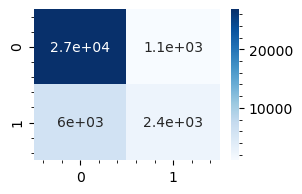

In [18]:
y_pred_proba_tr = xgb_full_final.predict_proba(X_train)[:,1]
y_pred_proba    = xgb_full_final.predict_proba(X_test)[:,1]
y_pred          = xgb_full_final.predict(X_test)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

## 5. Classification with Neural Network<a id='5'></a>

In [5]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model

### 5.1 NN3_1800_940_470_1 model<a id='5.1'></a>

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y.values.ravel(),test_size=0.25,random_state=123)

sc = StandardScaler()    
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [7]:
X_train.shape

(108923, 1880)

In [8]:
model = Sequential()

model.add(Dense(1880, activation='relu', input_shape=(1880,)))
model.add(Dense(940, activation='relu'))
model.add(Dense(470, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1880)              3536280   
_________________________________________________________________
dense_1 (Dense)              (None, 940)               1768140   
_________________________________________________________________
dense_2 (Dense)              (None, 470)               442270    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 471       
Total params: 5,747,161
Trainable params: 5,747,161
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [31]:
#callback = EarlyStopping(patience=3,restore_best_weights=True,verbose=1)
callback = EarlyStopping(patience=3,restore_best_weights=True)

In [12]:
%%time

from_file = False

t1 = dt.now()

if from_file:
    model = load_model('./data/nn_1880.h5')

else:
    model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])
    
    model.save('./data/nn_1880.h5')  # creates a HDF5 file 

print('\n val. score =',model.evaluate(X_test, y_test))

print(round((dt.now()-t1).total_seconds()/60,1),'min elapsed')
# 15 min

Epoch 1/50
3404/3404 [==============================] - 118s 35ms/step - loss: 0.4837 - auc: 0.7356 - val_loss: 0.4586 - val_auc: 0.7635
Epoch 2/50
3404/3404 [==============================] - 114s 34ms/step - loss: 0.4631 - auc: 0.7624 - val_loss: 0.4570 - val_auc: 0.7704
Epoch 3/50
3404/3404 [==============================] - 114s 34ms/step - loss: 0.4545 - auc: 0.7723 - val_loss: 0.4647 - val_auc: 0.7692
Epoch 4/50
3404/3404 [==============================] - 115s 34ms/step - loss: 0.4478 - auc: 0.7799 - val_loss: 0.4592 - val_auc: 0.7698
Epoch 5/50
3404/3404 [==============================] - 115s 34ms/step - loss: 0.4408 - auc: 0.7878 - val_loss: 0.4694 - val_auc: 0.7715
Epoch 00005: early stopping
1135/1135 [==============================] - 8s 7ms/step - loss: 0.4570 - auc: 0.7704

 val. score = [0.45695772767066956, 0.7704257965087891]
9.8 min elapsed
CPU times: user 1h 37s, sys: 45.2 s, total: 1h 1min 23s
Wall time: 9min 46s


### 5.2 NN3_360_180_90_1 model<a id='5.2'></a>

In [13]:
with open('./data/cols_RFE_lgbm.pkl', 'rb') as f:
    cols_reduced = pickle.load(f)

X_reduced = X[cols_reduced]
print(X_reduced.shape)

(145231, 360)


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y.values.ravel(),test_size=0.25,random_state=123)

sc = StandardScaler()    
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [66]:
model1 = Sequential()
model1.add(Dense(360, activation='relu', input_shape=(360,)))
model1.add(Dense(180, activation='relu'))
model1.add(Dense(90, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_31 (Dense)             (None, 180)               64980     
_________________________________________________________________
dense_32 (Dense)             (None, 90)                16290     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 91        
Total params: 211,321
Trainable params: 211,321
Non-trainable params: 0
_________________________________________________________________


In [67]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [68]:
%%time

history = model1.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])

print('\n val. score =',model1.evaluate(X_test, y_test))

# 1 min

Epoch 1/50
3404/3404 [==============================] - 7s 2ms/step - loss: 0.4688 - auc_9: 0.7523 - val_loss: 0.4570 - val_auc_9: 0.7688
Epoch 2/50
3404/3404 [==============================] - 6s 2ms/step - loss: 0.4558 - auc_9: 0.7700 - val_loss: 0.4549 - val_auc_9: 0.7705
Epoch 3/50
3404/3404 [==============================] - 7s 2ms/step - loss: 0.4517 - auc_9: 0.7752 - val_loss: 0.4509 - val_auc_9: 0.7742
Epoch 4/50
3404/3404 [==============================] - 7s 2ms/step - loss: 0.4467 - auc_9: 0.7812 - val_loss: 0.4533 - val_auc_9: 0.7727
Epoch 5/50
3404/3404 [==============================] - 6s 2ms/step - loss: 0.4411 - auc_9: 0.7878 - val_loss: 0.4529 - val_auc_9: 0.7727
Epoch 6/50
1135/1135 [==============================] - 1s 727us/step - loss: 0.4509 - auc_9: 0.7742

 val. score = [0.45090800523757935, 0.7741978168487549]
CPU times: user 2min 16s, sys: 13.1 s, total: 2min 29s
Wall time: 41.4 s


In [69]:
history.history.keys()

dict_keys(['loss', 'auc_9', 'val_loss', 'val_auc_9'])

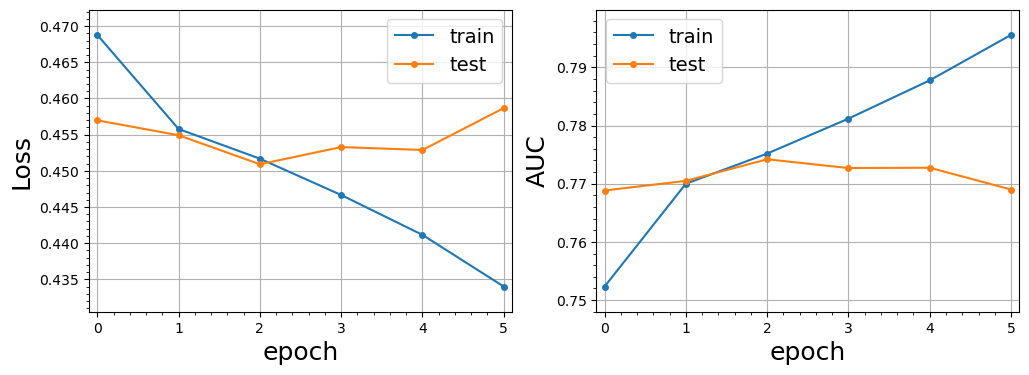

In [78]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax = ax.ravel()
ax[0].plot(history.history['loss'],marker='o',markersize=4)
ax[0].plot(history.history['val_loss'],marker='o',markersize=4)
ax[0].set_xlabel('epoch',fontsize=18); ax[0].set_ylabel('Loss',fontsize=18); 
ax[0].legend(['train', 'test'], fontsize=14)

ax[1].plot(history.history['auc_9'],marker='o',markersize=4)
ax[1].plot(history.history['val_auc_9'],marker='o',markersize=4)
ax[1].set_xlabel('epoch',fontsize=18); ax[1].set_ylabel('AUC',fontsize=18)
ax[1].legend(['train', 'test'], fontsize=14);

### 5.3 NN3_360_720_180_1 model<a id='5.3'></a>

In [18]:
model2 = Sequential()
model2.add(Dense(360, activation='relu', input_shape=(360,)))
model2.add(Dense(720, activation='relu'))
model2.add(Dense(180, activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_9 (Dense)              (None, 720)               259920    
_________________________________________________________________
dense_10 (Dense)             (None, 180)               129780    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 181       
Total params: 519,841
Trainable params: 519,841
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [20]:
%%time

model2.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])

print('\n val. score =',model2.evaluate(X_test, y_test))

Epoch 1/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4697 - auc_2: 0.7521 - val_loss: 0.4600 - val_auc_2: 0.7671
Epoch 2/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4565 - auc_2: 0.7693 - val_loss: 0.4539 - val_auc_2: 0.7715
Epoch 3/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4513 - auc_2: 0.7756 - val_loss: 0.4543 - val_auc_2: 0.7707
Epoch 4/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4468 - auc_2: 0.7811 - val_loss: 0.4528 - val_auc_2: 0.7723
Epoch 5/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4408 - auc_2: 0.7877 - val_loss: 0.4520 - val_auc_2: 0.7737
Epoch 6/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4334 - auc_2: 0.7956 - val_loss: 0.4567 - val_auc_2: 0.7678
Epoch 7/50
3404/3404 [==============================] - 13s 4ms/step - loss: 0.4242 - auc_2: 0.8048 - val_loss: 0.4624 - val_auc_2: 0.7639
Epoch 8/50
3404/3404 [=====

### 5.4 NN3_360_90_45_1 model<a id='5.4'></a>

In [21]:
model3 = Sequential()
model3.add(Dense(360, activation='relu', input_shape=(360,)))
model3.add(Dense(90, activation='relu'))
model3.add(Dense(45, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_13 (Dense)             (None, 90)                32490     
_________________________________________________________________
dense_14 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 46        
Total params: 166,591
Trainable params: 166,591
Non-trainable params: 0
_________________________________________________________________


In [22]:
model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [23]:
%%time

model3.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])

print('\n val. score =',model3.evaluate(X_test, y_test))

Epoch 1/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4689 - auc_3: 0.7526 - val_loss: 0.4692 - val_auc_3: 0.7626
Epoch 2/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4563 - auc_3: 0.7689 - val_loss: 0.4550 - val_auc_3: 0.7720
Epoch 3/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4516 - auc_3: 0.7751 - val_loss: 0.4567 - val_auc_3: 0.7670
Epoch 4/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4466 - auc_3: 0.7812 - val_loss: 0.4531 - val_auc_3: 0.7728
Epoch 5/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4413 - auc_3: 0.7872 - val_loss: 0.4549 - val_auc_3: 0.7707
Epoch 6/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4343 - auc_3: 0.7952 - val_loss: 0.4610 - val_auc_3: 0.7706
Epoch 7/50
3404/3404 [==============================] - 5s 1ms/step - loss: 0.4261 - auc_3: 0.8042 - val_loss: 0.4642 - val_auc_3: 0.7633
Epoch 00007: early stopping
1135/1

### 5.5 NN2_360_360_360_1 model<a id='5.5'></a>

In [24]:
model4 = Sequential()
model4.add(Dense(360, activation='relu', input_shape=(360,)))
model4.add(Dense(360, activation='relu'))
model4.add(Dense(360, activation='relu'))
model4.add(Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_17 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_18 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 361       
Total params: 390,241
Trainable params: 390,241
Non-trainable params: 0
_________________________________________________________________


In [25]:
model4.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [26]:
%%time

model4.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])

print('\n val. score =',model4.evaluate(X_test, y_test))

Epoch 1/50
3404/3404 [==============================] - 10s 3ms/step - loss: 0.4688 - auc_4: 0.7522 - val_loss: 0.4551 - val_auc_4: 0.7726
Epoch 2/50
3404/3404 [==============================] - 10s 3ms/step - loss: 0.4565 - auc_4: 0.7689 - val_loss: 0.4524 - val_auc_4: 0.7738
Epoch 3/50
3404/3404 [==============================] - 10s 3ms/step - loss: 0.4515 - auc_4: 0.7753 - val_loss: 0.4524 - val_auc_4: 0.7733
Epoch 4/50
3404/3404 [==============================] - 10s 3ms/step - loss: 0.4468 - auc_4: 0.7810 - val_loss: 0.4532 - val_auc_4: 0.7749
Epoch 5/50
3404/3404 [==============================] - 10s 3ms/step - loss: 0.4409 - auc_4: 0.7871 - val_loss: 0.4577 - val_auc_4: 0.7663
Epoch 00005: early stopping
1135/1135 [==============================] - 1s 828us/step - loss: 0.4524 - auc_4: 0.7738

 val. score = [0.45243197679519653, 0.7738345861434937]
CPU times: user 3min 16s, sys: 13 s, total: 3min 29s
Wall time: 51.1 s


### 5.6 NN4_360_180_90_45_1 model<a id='5.6'></a>

In [32]:
model5 = Sequential()
model5.add(Dense(360, activation='relu', input_shape=(360,)))
model5.add(Dense(180, activation='relu'))
model5.add(Dense(90, activation='relu'))
model5.add(Dense(45, activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_26 (Dense)             (None, 180)               64980     
_________________________________________________________________
dense_27 (Dense)             (None, 90)                16290     
_________________________________________________________________
dense_28 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 46        
Total params: 215,371
Trainable params: 215,371
Non-trainable params: 0
_________________________________________________________________


In [33]:
model5.compile(optimizer='adam',loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

In [34]:
%%time

model5.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,callbacks=[callback])

print('\n val. score =',model5.evaluate(X_test, y_test))

Epoch 1/50
3404/3404 [==============================] - 7s 2ms/step - loss: 0.4684 - auc_6: 0.7529 - val_loss: 0.4553 - val_auc_6: 0.7705
Epoch 2/50
3404/3404 [==============================] - 6s 2ms/step - loss: 0.4563 - auc_6: 0.7694 - val_loss: 0.4533 - val_auc_6: 0.7718
Epoch 3/50
3404/3404 [==============================] - 7s 2ms/step - loss: 0.4517 - auc_6: 0.7753 - val_loss: 0.4521 - val_auc_6: 0.7740
Epoch 4/50
3404/3404 [==============================] - 6s 2ms/step - loss: 0.4468 - auc_6: 0.7811 - val_loss: 0.4554 - val_auc_6: 0.7739
Epoch 5/50
3404/3404 [==============================] - 6s 2ms/step - loss: 0.4419 - auc_6: 0.7866 - val_loss: 0.4579 - val_auc_6: 0.7712
Epoch 6/50
1135/1135 [==============================] - 1s 761us/step - loss: 0.4521 - auc_6: 0.7740

 val. score = [0.4521390199661255, 0.7740196585655212]
CPU times: user 2min 13s, sys: 12.7 s, total: 2min 26s
Wall time: 40.6 s


roc_auc (train)=  0.78799
roc_auc (test) =  0.77494 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     27893
           1       0.60      0.33      0.42      8415

    accuracy                           0.79     36308
   macro avg       0.71      0.63      0.65     36308
weighted avg       0.77      0.79      0.77     36308



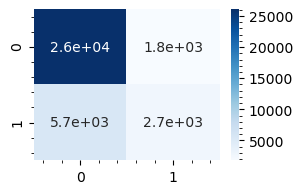

In [30]:
y_pred_proba_tr = model5.predict(X_train)
y_pred_proba    = model5.predict(X_test)
y_pred          = np.where(y_pred_proba > 0.5, 1, 0)

print('roc_auc (train)= ',round(roc_auc_score(y_train,y_pred_proba_tr,average = "weighted"),5))
print('roc_auc (test) = ',round(roc_auc_score(y_test,y_pred_proba,average = "weighted"),5),'\n')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);

## 6. Summary<a id='6'></a>